In [1]:
# Styling the notebook

from IPython.core.display import display, HTML
from IPython.display import Markdown, display


display(HTML("<style>.container { width:100% !important; }</style>"))


def display_centered_text(text):
    display(Markdown(f"<p style='text-align: center;'>{text}</p>"))


def display_bold_bigger_text(text):
    display(Markdown(f"<p style='text-align: center; font-weight: bold; font-size: 25px;'>{text}</p>"))

display_bold_bigger_text("Data Science NEET Academy Finals Project: Utilizing Machine Learning in NBA - analyzing trends and predicting match outcomes")



C:\Users\grgur\AppData\Local\Temp\ipykernel_17068\1147652041.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<p style='text-align: center; font-weight: bold; font-size: 25px;'>Data Science NEET Academy Finals Project: Utilizing Machine Learning in NBA - analyzing trends and predicting match outcomes</p>

This notebook has been created by Niko Grgurev.

There has been no violations regarding data privacy and collection, as all the data is publicly available to everyone. 

Project consists of two parts: exploratory data analysis of the NBA trends, and simple machine learning project to predict match outcomes. 

# 1. Exploratory data analysis

This is the first part of the project, where the main goal is to provide answers to burning questions regarding NBA and its trends throughout the history. I've decided to connect to the local database via sqlite, and used SQL as a query tool.

### 1.1 Importing packages, creating connection to database and read data

In [2]:
#%pip install matplotlib
#%pip install mitosheet

import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.express as px
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') #shoutout to fivethirtyeight.com for their graphics
import os
import mitosheet

In [3]:
# connect to SQL database
db_path = 'C:/Users/grgur/OneDrive/Desktop/nba.sqlite'
conn = sql.connect(db_path) # create connection object to database
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(table)

                   name
0                  game
1          game_summary
2           other_stats
3             officials
4      inactive_players
5             game_info
6            line_score
7          play_by_play
8                player
9                  team
10   common_player_info
11         team_details
12         team_history
13  draft_combine_stats
14        draft_history
15     team_info_common


### 1.2. Game Analysis

NBA is a gold mine when it comes to data. There is a lot of things happening on and off the court, so one can have so many questions. Let's dive into it and find the answers to some of the questions.

#### 1.2.2. NBA Attendance

Knowing that the basketball is second most popular sport in USA, it's only natural to visualize the trends regarding game attendance.

In [4]:
# Finding top 10 games by attendance 

# Execute the SQL query to retrieve the data
query = '''
SELECT game.game_date,
       game.team_name_home || ' v ' || game.team_name_away AS team_names,
       game_info.attendance
FROM game
JOIN game_info ON game.game_id = game_info.game_id
ORDER BY game_info.attendance DESC
LIMIT 10;
'''
data = conn.execute(query).fetchall()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=['Game Date', 'Team Names', 'Attendance'])

# Display the table
print(df)

             Game Date                                 Team Names  Attendance
0  1995-03-17 00:00:00                New Jersey Nets v Utah Jazz      200049
1  1995-04-18 00:00:00         Minnesota Timberwolves v Utah Jazz      144442
2  2023-01-13 00:00:00  San Antonio Spurs v Golden State Warriors       68323
3  1998-03-27 00:00:00              Atlanta Hawks v Chicago Bulls       62046
4  1988-01-29 00:00:00           Detroit Pistons v Boston Celtics       61983
5  1987-02-14 00:00:00       Detroit Pistons v Philadelphia 76ers       52745
6  1990-04-17 00:00:00    Minnesota Timberwolves v Denver Nuggets       49551
7  1967-12-25 00:00:00     Baltimore Bullets v Philadelphia 76ers       49456
8  1988-03-30 00:00:00            Detroit Pistons v Atlanta Hawks       47692
9  1990-03-04 00:00:00         Phoenix Suns v Cleveland Cavaliers       47487


In [5]:
# Attendance trends throughout the history

query = '''
SELECT AVG(attendance) AS average_attendance
FROM game_info
WHERE game_info.game_date >= '2022-01-01' AND game_info.game_date <= '2022-12-31';
'''
result = conn.execute(query).fetchone()

# Extract the average attendance from the result
average_attendance = result[0]

# Print the average attendance
print(f"Average Attendance for 2022: {average_attendance}")

# Execute the SQL query
query = '''
SELECT AVG(attendance) AS average_attendance
FROM game_info
WHERE game_info.game_date >= DATE('now', '-20 years');
'''
result = conn.execute(query).fetchone()

# Extract the average attendance from the result
average_attendance = result[0]

# Print the average attendance
print(f"Average Attendance for the Last 20 Years: {average_attendance}")

Average Attendance for 2022: 17578.660361842107
Average Attendance for the Last 20 Years: 17213.14163511429


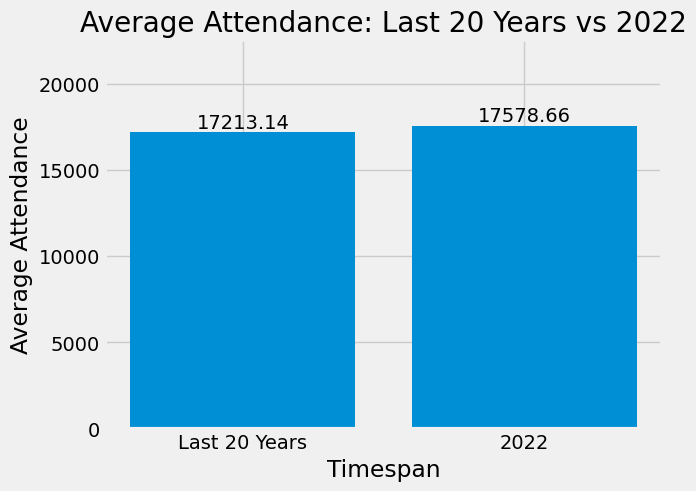

In [6]:
# Further visualization

# Execute the SQL query for average attendance in the last 20 years
query_last_20_years = '''
SELECT AVG(attendance) AS average_attendance
FROM game_info
WHERE game_info.game_date >= DATE('now', '-20 years');
'''
result_last_20_years = conn.execute(query_last_20_years).fetchone()
average_attendance_last_20_years = result_last_20_years[0]

# Execute the SQL query for average attendance in 2022
query_2022 = '''
SELECT AVG(attendance) AS average_attendance
FROM game_info
WHERE game_info.game_date >= '2022-01-01' AND game_info.game_date <= '2022-12-31';
'''
result_2022 = conn.execute(query_2022).fetchone()
average_attendance_2022 = result_2022[0]

# Calculate the difference in attendance
difference = average_attendance_2022 - average_attendance_last_20_years

# Create the bar chart
plt.bar(['Last 20 Years', '2022'], [average_attendance_last_20_years, average_attendance_2022])
plt.xlabel('Timespan')
plt.ylabel('Average Attendance')
plt.title('Average Attendance: Last 20 Years vs 2022')
# Adjust the position of the labels
plt.text(0, average_attendance_last_20_years, f'{average_attendance_last_20_years:.2f}', ha='center', va='bottom')
plt.text(1, average_attendance_2022, f'{average_attendance_2022:.2f}', ha='center', va='bottom')

plt.ylim(0, max(average_attendance_last_20_years, average_attendance_2022) + 5000)
plt.show()

##### We can say for a fact that NBA has maintained its popularity throughout two decades, and the trend follows. Let's not forget that COVID-19 had enormous impact on attendance when the games were played behind closed doors. 

Can we further visualize average attendance on home/away games in the NBA? Bear in mind, we need to get results after 2004, since that was the last year NBA introduced new team into the organization.

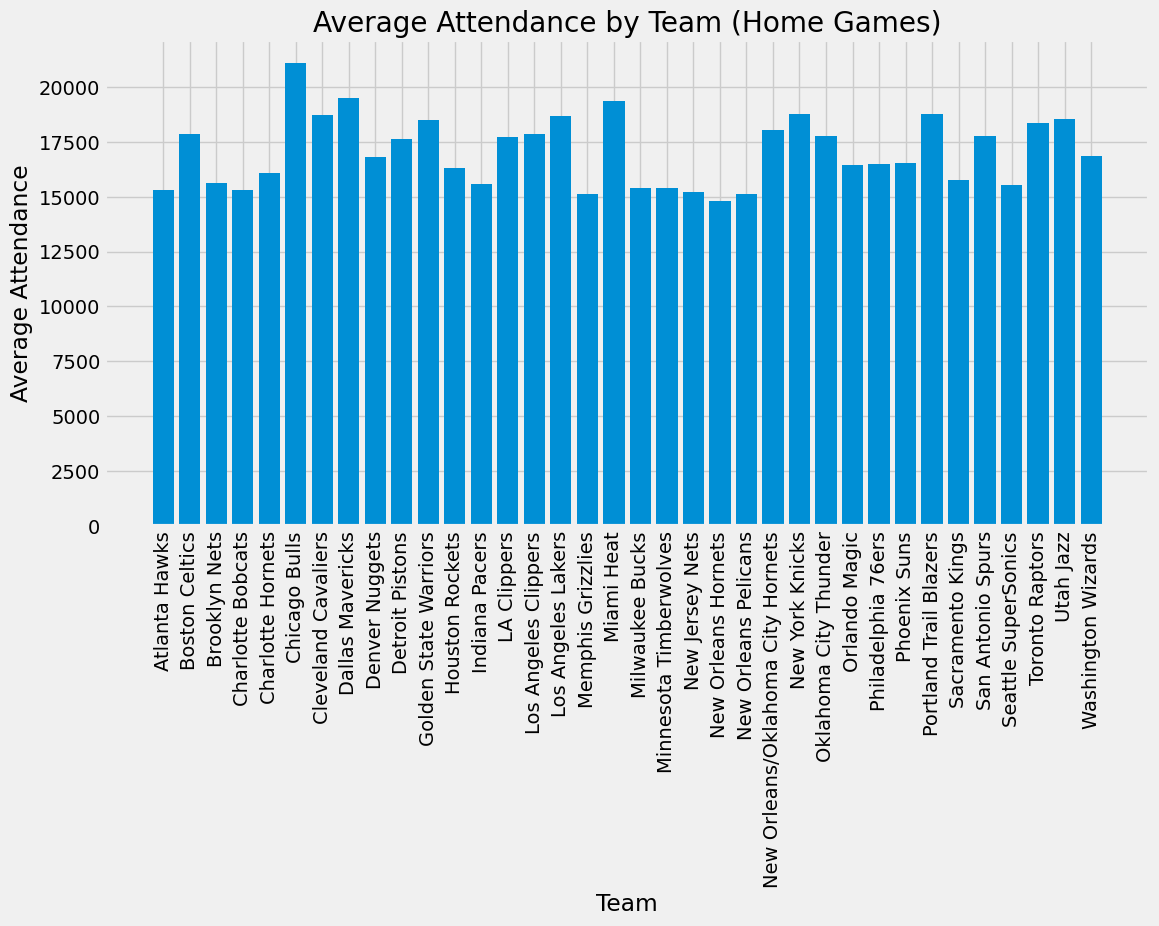

In [7]:
# Home game attendance

# Execute the SQL query to calculate average attendance for each team_name_home from 2004 till today
query_avg_attendance = '''
SELECT g.team_name_home, AVG(gi.attendance) AS average_attendance
FROM game g
JOIN game_info gi ON g.game_id = gi.game_id
WHERE gi.game_date >= '2004-01-01' AND gi.game_date <= DATE('now')
GROUP BY g.team_name_home;
'''

# Fetch the data into a DataFrame
df_avg_attendance = pd.read_sql_query(query_avg_attendance, conn)

# Plot the average attendance for each team
plt.figure(figsize=(12, 6))
plt.bar(df_avg_attendance['team_name_home'], df_avg_attendance['average_attendance'])
plt.xlabel('Team')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Team (Home Games)')
plt.xticks(rotation=90)
plt.show()

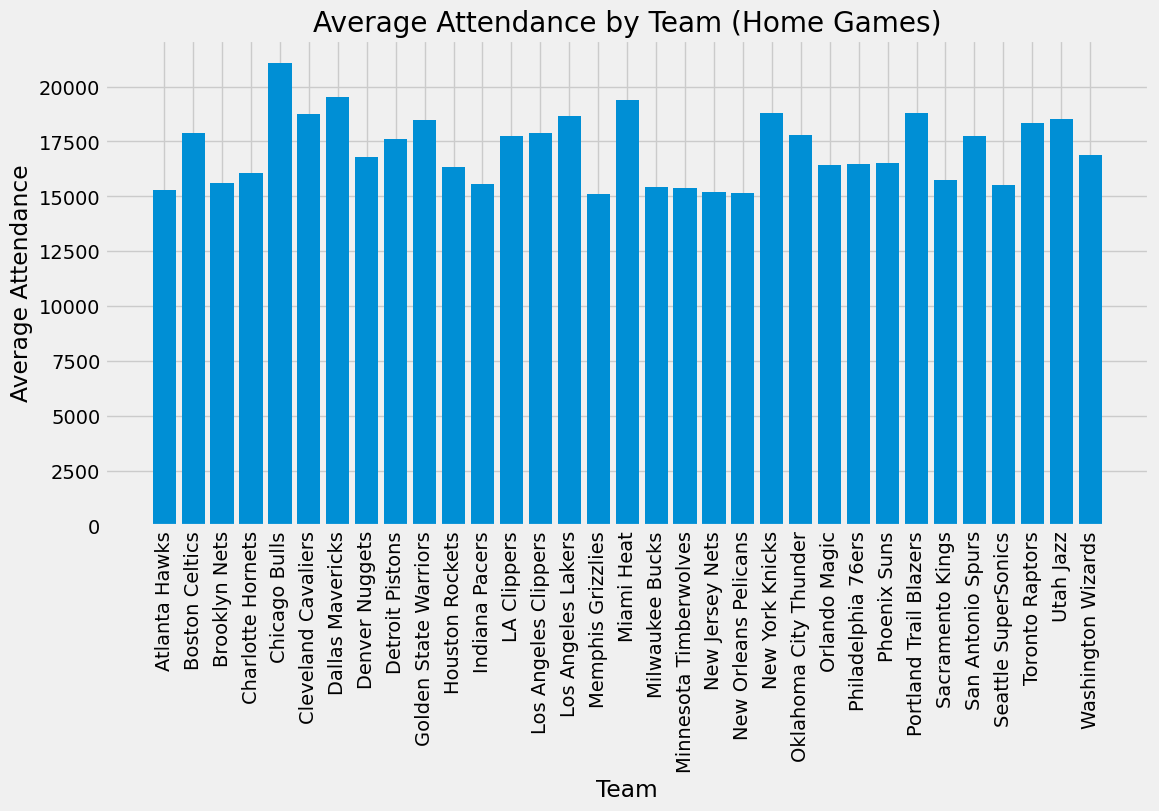

In [8]:
# Excluding organizations that are no longer a part of the NBA 

# Define the excluded teams
excluded_teams = [
    "Charlotte Bobcats",
    "New Orleans Hornets",
    "New Orleans/Oklahoma City Hornets",
    "Seattle Supersonics"
]

# Execute the SQL query to calculate average attendance for each team_name_home from 2004 till today, excluding the specified teams
query_avg_attendance = '''
SELECT g.team_name_home, AVG(gi.attendance) AS average_attendance
FROM game g
JOIN game_info gi ON g.game_id = gi.game_id
WHERE gi.game_date >= '2004-01-01' AND gi.game_date <= DATE('now')
    AND g.team_name_home NOT IN (?, ?, ?, ?)
GROUP BY g.team_name_home;
'''

# Fetch the data into a DataFrame, passing the excluded teams as parameters
df_avg_attendance = pd.read_sql_query(query_avg_attendance, conn, params=excluded_teams)

# Plot the average attendance for each team
plt.figure(figsize=(12, 6))
plt.bar(df_avg_attendance['team_name_home'], df_avg_attendance['average_attendance'])
plt.xlabel('Team')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Team (Home Games)')
plt.xticks(rotation=90)
plt.show()

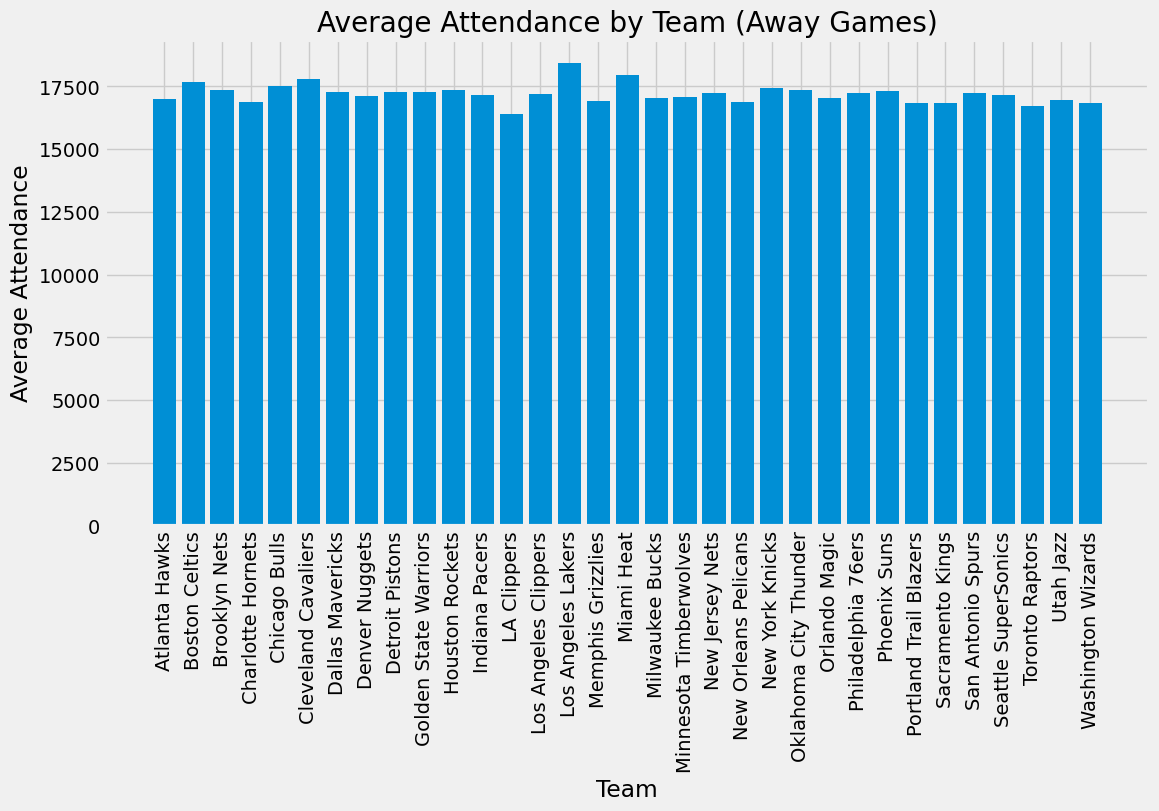

In [9]:
# Away game attendance

# Define the excluded teams
excluded_teams = [
    "Charlotte Bobcats",
    "New Orleans Hornets",
    "New Orleans/Oklahoma City Hornets",
    "Seattle Supersonics"
]

# Execute the SQL query to calculate average attendance for each team_name_away from 2004 till today, excluding the specified teams
query_avg_attendance = '''
SELECT g.team_name_away, AVG(gi.attendance) AS average_attendance
FROM game g
JOIN game_info gi ON g.game_id = gi.game_id
WHERE gi.game_date >= '2004-01-01' AND gi.game_date <= DATE('now')
    AND g.team_name_away NOT IN (?, ?, ?, ?)
GROUP BY g.team_name_away;
'''

# Fetch the data into a DataFrame, passing the excluded teams as parameters
df_avg_attendance = pd.read_sql_query(query_avg_attendance, conn, params=excluded_teams)

# Plot the average attendance for each team
plt.figure(figsize=(12, 6))
plt.bar(df_avg_attendance['team_name_away'], df_avg_attendance['average_attendance'])
plt.xlabel('Team')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Team (Away Games)')
plt.xticks(rotation=90)
plt.show()


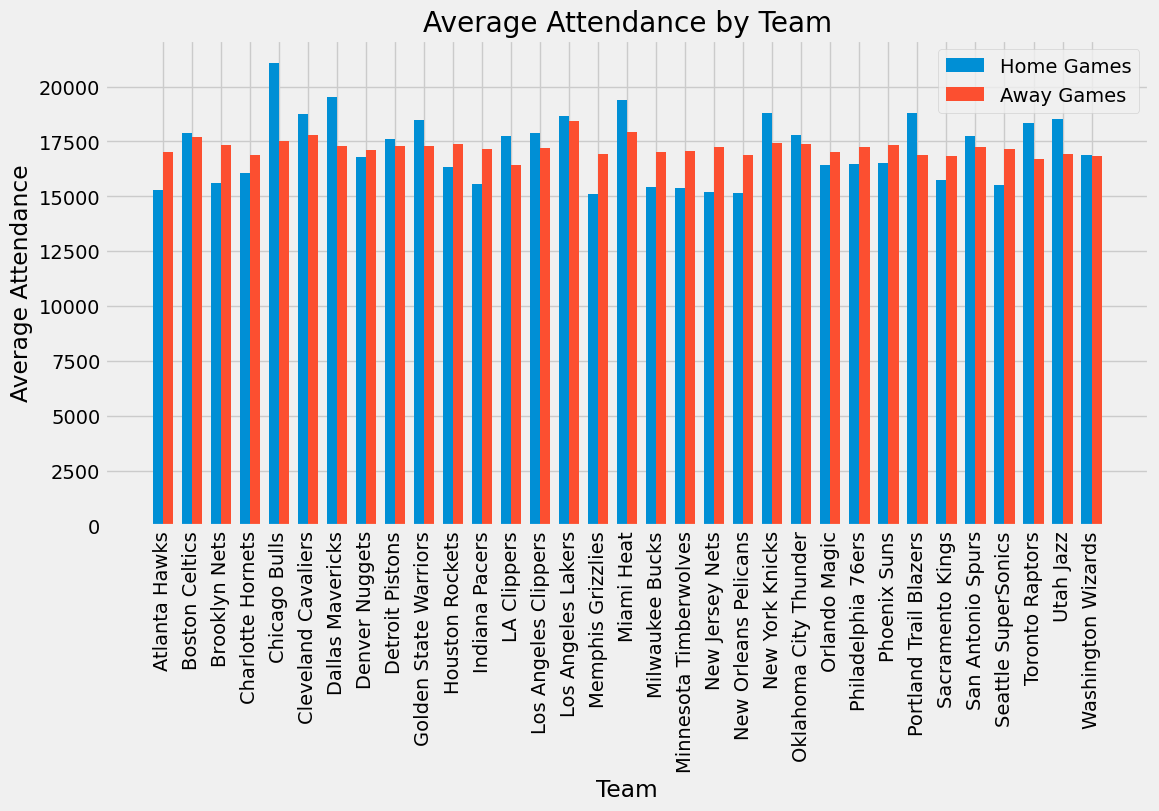

In [10]:
# Plotting it all together

# Define the excluded teams
excluded_teams = [
    "Charlotte Bobcats",
    "New Orleans Hornets",
    "New Orleans/Oklahoma City Hornets",
    "Seattle Supersonics"
]

# Execute the SQL query to calculate average attendance for each team_name_home from 2004 till today, excluding the specified teams
query_home_avg_attendance = '''
SELECT g.team_name_home, AVG(gi.attendance) AS average_attendance
FROM game g
JOIN game_info gi ON g.game_id = gi.game_id
WHERE gi.game_date >= '2004-01-01' AND gi.game_date <= DATE('now')
    AND g.team_name_home NOT IN (?, ?, ?, ?)
GROUP BY g.team_name_home;
'''

# Fetch the home game data into a DataFrame, passing the excluded teams as parameters
df_home_avg_attendance = pd.read_sql_query(query_home_avg_attendance, conn, params=excluded_teams)

# Execute the SQL query to calculate average attendance for each team_name_away from 2004 till today, excluding the specified teams
query_away_avg_attendance = '''
SELECT g.team_name_away, AVG(gi.attendance) AS average_attendance
FROM game g
JOIN game_info gi ON g.game_id = gi.game_id
WHERE gi.game_date >= '2004-01-01' AND gi.game_date <= DATE('now')
    AND g.team_name_away NOT IN (?, ?, ?, ?)
GROUP BY g.team_name_away;
'''

# Fetch the away game data into a DataFrame, passing the excluded teams as parameters
df_away_avg_attendance = pd.read_sql_query(query_away_avg_attendance, conn, params=excluded_teams)

# Determine the positions for the bars
bar_width = 0.35
bar_home = np.arange(len(df_home_avg_attendance))
bar_away = bar_home + bar_width

# Plot the average attendance for home and away games
plt.figure(figsize=(12, 6))
plt.bar(bar_home, df_home_avg_attendance['average_attendance'], width=bar_width, label='Home Games')
plt.bar(bar_away, df_away_avg_attendance['average_attendance'], width=bar_width, label='Away Games')
plt.xlabel('Team')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Team')
plt.xticks(bar_home + bar_width / 2, df_home_avg_attendance['team_name_home'], rotation=90)
plt.legend()
plt.show()

Bulls, Heat and Jazz have the best attendance when it comes to their home games. When it comes to attendance when playing away, Lakers, Cavaliers and Heat hold the numbers.

#### 1.2.3. Who are the best 10 referees in the organization according to number of games they've officiated?

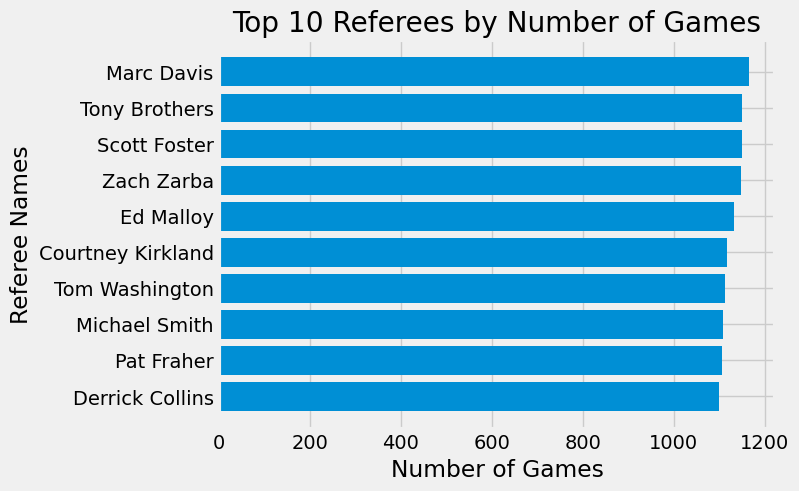

In [11]:
# Execute the SQL query to retrieve the top 10 referees by the number of matches they appear in
query = '''
SELECT officials.first_name, officials.last_name, COUNT(*) AS match_count
FROM officials
JOIN game ON officials.game_id = game.game_id
GROUP BY officials.official_id
ORDER BY match_count DESC
LIMIT 10
'''
result = conn.execute(query).fetchall()

# Extract referee names and match counts from the query result
referee_names = [f'{row[0]} {row[1]}' for row in result[::-1]]
match_counts = [row[2] for row in result[::-1]]

# Create the bar plot
plt.barh(referee_names, match_counts)
plt.xlabel('Number of Games')
plt.ylabel('Referee Names')
plt.title('Top 10 Referees by Number of Games')

plt.show()

Top 3 referees really are top of the pops, as one would say. They're the best out there, and they're in the league for a long time, knowing a lot of players and staff, which can be crucial when you're trying to maintain the level of authority and respect on court as a referee. If we were to put their names into a different context, we would see that Scott Foster, third on the list, is the most reliable one with 23 NBA Finals under his belt. Right after him we have Marc Davis with 18, and Tony Brothers with 15 finals.

#### 1.2.4. Since we're talking about the officials, there's a rumour that referees provide slight homecourt advantage by giving away more free throws to the home team, which is something that's been discussed for a while. Let's find an answer to this.

In [12]:
# querying free throw percentages according to the location

query = """
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_HOME AS team_id,
        TEAM_NAME_HOME AS team_name,
        FT_PCT_HOME AS free_throw_percentage,
        COUNT(TEAM_ID_HOME) AS team_game_count,
        "home" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_HOME 
    
    UNION
    
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_AWAY AS team_id,
        TEAM_NAME_AWAY AS team_name,
        FT_PCT_AWAY AS free_throw_percentage,
        COUNT(TEAM_ID_AWAY) AS team_game_count,
        "away" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_AWAY
"""
team_level_free_throw_stats = pd.read_sql(query, conn)
team_level_free_throw_stats

season     team_id           team_name  free_throw_percentage  \
0       1946  1610610025       Chicago Stags                    NaN   
1       1946  1610610025       Chicago Stags                    NaN   
2       1946  1610610026    Cleveland Rebels                    NaN   
3       1946  1610610026    Cleveland Rebels                  0.667   
4       1946  1610610028     Detroit Falcons                    NaN   
...      ...         ...                 ...                    ...   
3151    2022  1610612764  Washington Wizards                  0.909   
3152    2022  1610612765     Detroit Pistons                  0.594   
3153    2022  1610612765     Detroit Pistons                  0.792   
3154    2022  1610612766   Charlotte Hornets                  0.786   
3155    2022  1610612766   Charlotte Hornets                  0.870   

      team_game_count game_location  
0                  30          away  
1                  31          home  
2                  30          home  
3                  30          away  
4                  30          home  
...               ...           ...  
3151               32          home  
3152               33          away  
3153               35          home  
3154               33          home  
3155               37          away  

[3156 rows x 6 columns]

In [13]:
# identify nulls and drop them
team_level_free_throw_stats.isna()["free_throw_percentage"].sum()
team_level_free_throw_stats = team_level_free_throw_stats.dropna().query("free_throw_percentage < 1").reset_index(drop=True)

In [14]:
# using median to get the formula
cols_to_drop = ["team_id", "team_name", "team_game_count"]
median_ft_pct = team_level_free_throw_stats.drop(cols_to_drop, axis=1).groupby(["season", "game_location"]).median().reset_index()
px.line(median_ft_pct, x="season", y="free_throw_percentage", 
           color="game_location", title="Free throws: home v away")

We can see a couple of spikes here and there, but most of the seasons, free throws were distributed equally on home court as they were on away ones - waive the rumors.

#### 1.2.5. Modern basketball is not what it used to be at all. Someone who's maybe not coming from the basketball background and has no basic knowledge of the game, can easily misinterpret the team game, since most of the stuff you can see today is way faster than it used to be. Next thesis says that teams are shooting threes more than ever, and it's all thanks to the statistics and the realisation that 3PT shot is more valuable than the 2PT shot. 

Although one can argue that modern basketball destroyed all the fundamentals with the extended usage of 3PT shots, let's see if the trend follows the free throw trends.

In [15]:
# same process as above, but this time we're calculating 3pt
query = """
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_HOME AS team_id,
        TEAM_NAME_HOME AS team_name,
        FG3_PCT_HOME AS three_point_percentage,
        COUNT(TEAM_ID_HOME) AS team_game_count,
        "home" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_HOME 
    
    UNION
    
    SELECT 
        SEASON_ID-20000 AS season,
        TEAM_ID_AWAY AS team_id,
        TEAM_NAME_AWAY AS team_name,
        FG3_PCT_AWAY AS three_point_percentage,
        COUNT(TEAM_ID_AWAY) AS team_game_count,
        "away" AS game_location
    FROM Game
    GROUP BY SEASON_ID, TEAM_ID_AWAY
"""
team_level_three_point_stats = pd.read_sql(query, conn)

# identify nulls and drop

team_level_three_point_stats.isna()["three_point_percentage"].sum()
team_level_three_point_stats = team_level_three_point_stats.dropna().query("three_point_percentage < 1").reset_index(drop=True)

# med 3pt per location
cols_to_drop = ["team_id", "team_name", "team_game_count"]
median_3p_pct = team_level_three_point_stats.drop(cols_to_drop, axis=1).groupby(["season", "game_location"]).median().reset_index()

# viz
px.line(median_3p_pct.query("season > 1986"), x="season", y="three_point_percentage", color="game_location", title="3PT percentage per Location")

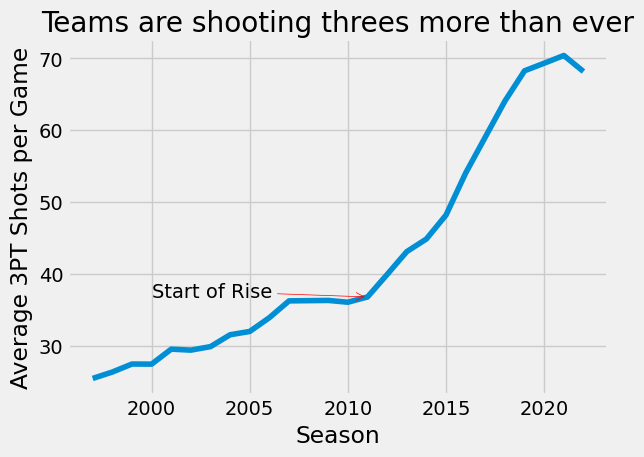

In [16]:
# Execute the SQL query to retrieve the yearly average 3-point shots per game
query = '''
SELECT SEASON_ID-20000 AS season,
       AVG(fg3a_home + fg3a_away) AS avg_3pt_shots_per_game
FROM game
WHERE season >= 1997
GROUP BY season
ORDER BY season
'''
result = conn.execute(query).fetchall()

# Extract the season and average 3-point shots per game from the query result
seasons = [row[0] for row in result]
avg_3pt_shots = [row[1] for row in result]

# Plot the data
plt.plot(seasons, avg_3pt_shots)
plt.xlabel('Season')
plt.ylabel('Average 3PT Shots per Game')
plt.title('Teams are shooting threes more than ever')

arrow_y = avg_3pt_shots[seasons.index(2011)]
plt.annotate('Start of Rise', xy=(2011, arrow_y), xytext=(2000, arrow_y),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.show()

We can say that the thesis above is correct, but we needed to keep one thing in mind when we encountered this question: the extension of 3-point line which happened in 1990s - so we plotted average shots from 1997 till today. Trend is still there, and three point shot is still considered to be the most valuable in the game. I've annotated 2011. as a year when 3PT shots started to skyrocket, and there's a reason for it. Stephen Curry - GOAT PG - has entered NBA 2 years before, and made everyone look crazy by making half-court shots like it's nothing.

#### 1.2.6. Home court advantage is known to be lethal when it comes to European football. Can we say the same thing for NBA? Is there a home court advantage when it comes to our beloved basketball masters?

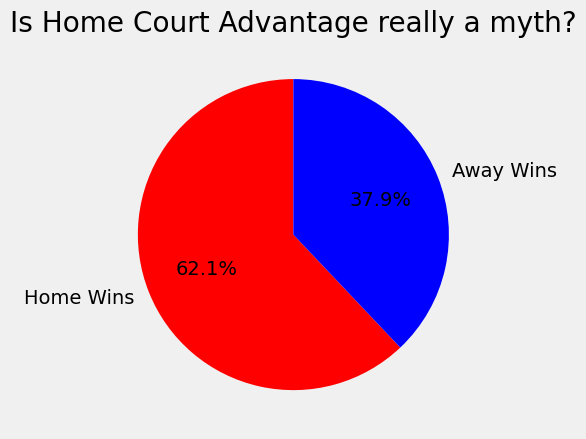

In [17]:
# Query to retrieve the data and drop null values
query = '''
    SELECT COUNT(*) AS total_games,
           SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
           SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS away_wins
    FROM game
    WHERE pts_home IS NOT NULL AND pts_away IS NOT NULL
'''

# Execute the query and fetch the results
results = pd.read_sql_query(query, conn)

# Get the total games, home wins, and away wins
total_games = results['total_games'].values[0]
home_wins = results['home_wins'].values[0]
away_wins = results['away_wins'].values[0]

# Prepare the data for the pie chart
labels = ['Home Wins', 'Away Wins']
sizes = [home_wins, away_wins]
colors = ['#ff0000', '#0000ff']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Is Home Court Advantage really a myth?')

# Display the chart
plt.show()

Home court advantage certainly exist in the NBA, but, it doesn't play as crucial role in the regular season as it does in the Playoffs. It's not as lethal as in football though, where home advantage increases the chances of winning by 15.9 per cent, and, for instance in EPL, home court advantage is laying around 70% to begin with. 

62.1% is still not to waive, and I think we can make use of this information further in ML. 

But for now, can we define top 10 teams that are defending their home court the best?

           team_name_home  home_wins
0          Boston Celtics       2085
1         New York Knicks       1748
2      Los Angeles Lakers       1741
3         Detroit Pistons       1501
4      Philadelphia 76ers       1423
5            Phoenix Suns       1411
6           Chicago Bulls       1367
7  Portland Trail Blazers       1365
8         Milwaukee Bucks       1361
9           Atlanta Hawks       1320


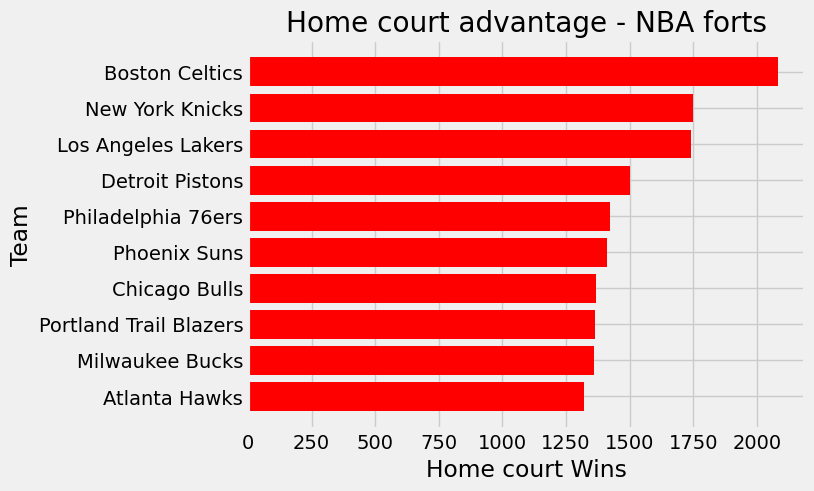

In [18]:
# Query to retrieve the top 10 teams with the most home wins
query = '''
    SELECT team_name_home, SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins
    FROM game
    GROUP BY team_name_home
    HAVING home_wins > 0
    ORDER BY home_wins DESC
    LIMIT 10
'''

# Execute the query and fetch the results
results = pd.read_sql_query(query, conn)

# Display the top 10 teams with the most home wins
print(results)

# Let's further visualize this:

# Reverse the order of the results DataFrame
results = results.sort_values('home_wins', ascending=True)

# Create a bar chart
plt.barh(range(len(results)), results['home_wins'], color='red')

# Add labels and title
plt.xlabel('Home court Wins')
plt.ylabel('Team')
plt.title('Home court advantage - NBA forts')

# Add team names as y-tick labels in reverse order
plt.yticks(range(len(results)), results['team_name_home'])

# Display the chart
plt.show()

We can conclude that the Boston Celtics are the best home team in the league by far, with Knicks and Lakers battling each other in a close matchup - only 7 games difference.

### 1.3. Player Analysis

For this part of the analysis, we'll introduce local .csv file including player performance from 1999 until 2020.

#### 1.3.1. Importing libraries and reading data

In [27]:
# Comment out the cell if requirements are not met

##%pip install seaborn
##import seaborn as sns
##import numpy as np
##import pandas as pd
##import matplotlib.pyplot as plt
##%matplotlib inline

In [21]:
raw = pd.read_csv('C:/Users/grgur/OneDrive/Desktop/NBA Machine Learning Project/data/playereda/playereda.csv')
raw.head(10)

Player Pos   Age   Tm     G    GS    MP   FG   FGA  \
0          Precious Achiuwa   C  23.0  TOR  38.0  11.0  23.3  3.9   8.1   
1              Steven Adams   C  29.0  MEM  42.0  42.0  27.0  3.7   6.3   
2               Bam Adebayo   C  25.0  MIA  57.0  57.0  35.0  8.4  15.7   
3              Ochai Agbaji  SG  22.0  UTA  39.0   2.0  15.6  1.8   3.8   
4              Santi Aldama  PF  22.0  MEM  56.0  18.0  22.0  3.3   7.0   
5  Nickeil Alexander-Walker  SG  24.0  TOT  40.0   3.0  14.5  2.3   4.9   
6  Nickeil Alexander-Walker  SG  24.0  UTA  36.0   3.0  14.7  2.3   4.7   
7  Nickeil Alexander-Walker  SG  24.0  MIN   4.0   0.0  13.0  2.5   6.0   
8             Grayson Allen  SG  27.0  MIL  56.0  54.0  27.6  3.4   7.8   
9             Jarrett Allen   C  24.0  CLE  57.0  57.0  33.2  6.2   9.4   

     FG%  ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.482  ...  0.689  2.0  4.6   6.6  1.0  0.6  0.7  1.2  2.1  10.2  
1  0.597  ...  0.364  5.1  6.5  11.5  2.3  0.9  1.1  1.9  2.3   8.6  
2  0.536  ...  0.800  2.6  7.2   9.8  3.2  1.2  0.8  2.5  2.8  21.2  
3  0.483  ...  0.682  0.7  1.1   1.8  0.6  0.2  0.1  0.3  1.4   5.0  
4  0.474  ...  0.729  1.0  3.6   4.6  1.2  0.7  0.7  0.7  1.9   9.4  
5  0.479  ...  0.675  0.3  1.4   1.7  2.0  0.6  0.4  1.2  1.5   6.3  
6  0.488  ...  0.692  0.2  1.4   1.6  2.1  0.7  0.4  1.3  1.6   6.3  
7  0.417  ...  0.000  0.5  1.5   2.0  0.5  0.3  0.5  1.0  0.8   6.3  
8  0.440  ...  0.906  0.9  2.5   3.4  2.4  0.8  0.2  1.1  1.6  10.5  
9  0.654  ...  0.733  3.2  6.7   9.9  1.6  0.8  1.2  1.5  2.2  14.8  

[10 rows x 29 columns]

#### 1.3.2. Cleaning data

In [22]:
# figuring nulls out

print(raw.isnull().sum())
print(raw.dtypes)

Player    25
Pos       25
Age       25
Tm        25
G         25
GS        25
MP        25
FG        25
FGA       25
FG%       29
3P        25
3PA       25
3P%       55
2P        25
2PA       25
2P%       34
eFG%      29
FT        25
FTA       25
FT%       77
ORB       25
DRB       25
TRB       25
AST       25
STL       25
BLK       25
TOV       25
PF        25
PTS       25
dtype: int64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object


In [23]:
# exporting nulls from a set

raw[raw.isnull().reset_index()]

Player  Pos  Age   Tm   G  GS  MP  FG  FGA  FG%  ...  FT%  ORB  DRB  TRB  \
0      NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
1      NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2      NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
3      NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
4      NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
..     ...  ...  ...  ...  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
644    NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
645    NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
646    NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
647    NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
648    NaN  NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

     AST  STL  BLK  TOV  PF  PTS  
0    NaN  NaN  NaN  NaN NaN  NaN  
1    NaN  NaN  NaN  NaN NaN  NaN  
2    NaN  NaN  NaN  NaN NaN  NaN  
3    NaN  NaN  NaN  NaN NaN  NaN  
4    NaN  NaN  NaN  NaN NaN  NaN  
..   ...  ...  ...  ...  ..  ...  
644  NaN  NaN  NaN  NaN NaN  NaN  
645  NaN  NaN  NaN  NaN NaN  NaN  
646  NaN  NaN  NaN  NaN NaN  NaN  
647  NaN  NaN  NaN  NaN NaN  NaN  
648  NaN  NaN  NaN  NaN NaN  NaN  

[649 rows x 29 columns]

In [24]:
# dropping nulls 

players = raw.dropna()
players.isnull().sum()
players.shape

(552, 29)

In [25]:
# some players are sorted as dual-positions regarding their playstyle and preferences - we can sort dual positions to be treated as a singular positions

players['Pos'].replace({'SF-SG': 'SF', 'SG-PG': 'SG', 'PF-SF':'PF'}, inplace=True)
players['Pos'].value_counts()

C:\Users\grgur\AppData\Local\Temp\ipykernel_17068\3762675996.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



SG    135
PG    114
PF    105
SF    100
C      98
Name: Pos, dtype: int64

#### 1.3.3. Average metrics per position

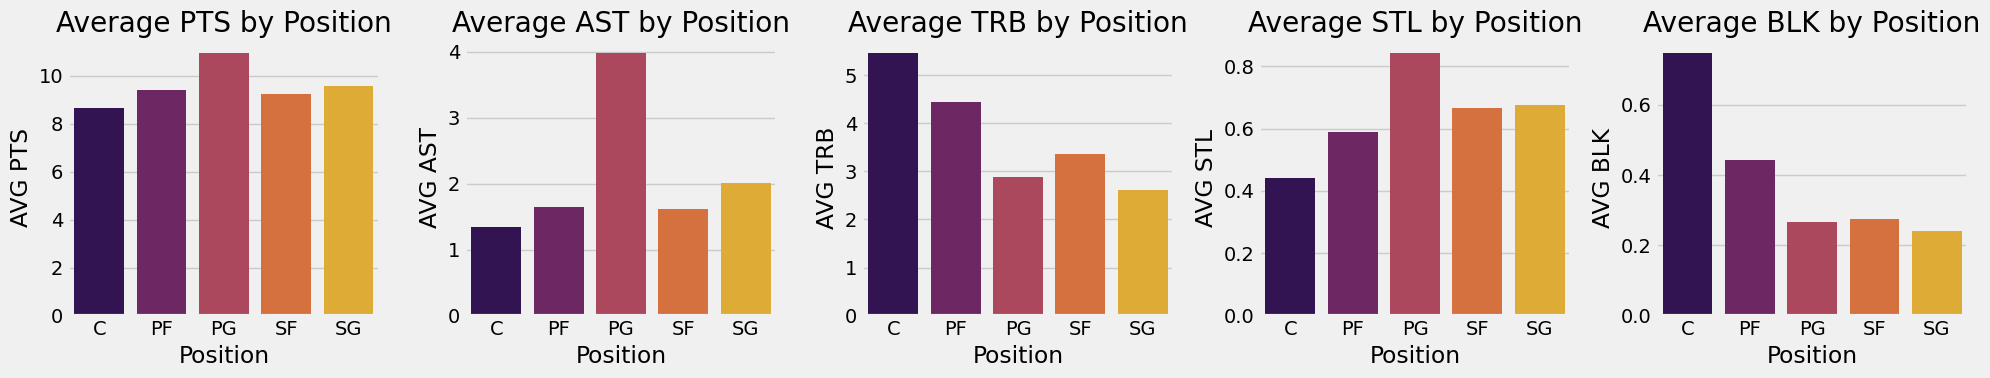

In [28]:
# Function to create bar plots for the given metric and axis
def plot_position_metric(metric,metric_name, ax):
    sns.barplot(x='Pos', y=metric, data=position_stats, palette='inferno', ax=ax)
    ax.set_title(f'Average {metric_name} by Position')
    ax.set_xlabel('Position')
    ax.set_ylabel(f'AVG {metric}')
    
# Group the data by position and calculate the average of key performance metrics
position_stats = players.groupby('Pos').agg({
    'PTS': np.mean,
    'AST': np.mean,
    'TRB': np.mean,
    'STL': np.mean,
    'BLK': np.mean
}).reset_index()

# Create bar plots for key performance metrics
metrics = ['PTS', 'AST', 'TRB', 'STL', 'BLK']
metric_name = ['PTS','AST','TRB','STL','BLK']

# Create a subplot grid for the bar plots
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(20, 4))

# Create bar plots for key performance metrics
for i, metric in enumerate(metrics):
    plot_position_metric(metric,metric_name[i], axes[i])
    
# Adjust the layout to avoid overlapping labels
plt.tight_layout()
plt.show()

#### 1.3.4. Position with the highest overall averages

Highest average position is PG, with respective averages: 
PTS    10.927193
AST     3.973684
TRB     2.886842
STL     0.841228
BLK     0.265789
Name: PG, dtype: float64


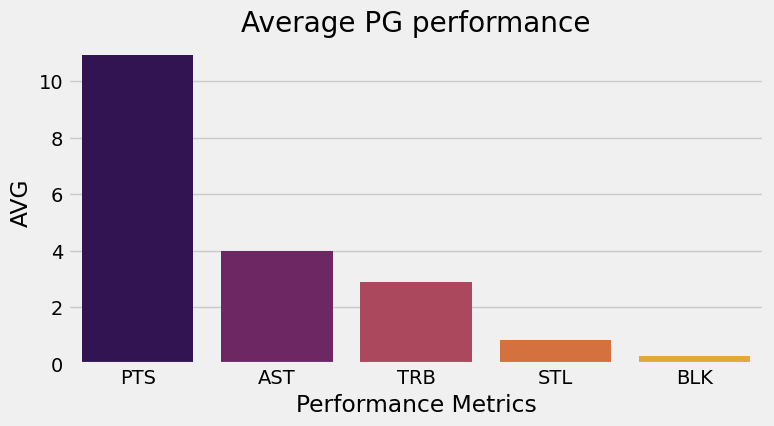

In [29]:
averages = players.groupby("Pos")[metrics].mean() #mean meaning average

highest_average_position = averages.mean(axis=1).idxmax()

print(f'Highest average position is {highest_average_position}, with respective averages: ')

highest_average_position_averages =  averages.loc[highest_average_position]
print(highest_average_position_averages)

# Create a bar plot for the highest average position
plt.figure(figsize=(8, 4))
sns.barplot(x=highest_average_position_averages.index, y=highest_average_position_averages.values, palette='inferno')
plt.title(f'Average {highest_average_position} performance')
plt.xlabel('Performance Metrics')
plt.ylabel('AVG')
plt.show()

PG (Point Guard) is the number one position when it comes to average performances. Obviously, it doesn't come as a surprise that the points columns is the highest one, following with the assists. You will not see a lot of rebounding when it comes to point guards, thesis is confirmed with this plot. 

But, since we also have some advanced metrics such as effective field goal percentage (Effective Field Goal Percentage is a measurement of how successful your team is from the field. This metric provides a more complete picture of the game situation than standard field goal percentages because three point shots are given extra weight. Formula for eFG% is: 

(2pt FGM + 1.5*3pt FGM) / FGA),

we can visualize eFG% across the positions to see which ones are "most valuable".

#### 1.3.5. Most valuable positions regarding effective FG percentage

In [30]:
fig = px.histogram(players, x='Pos', y='eFG%', color='Pos', histfunc='avg')
fig.update_layout(
    title='Effective Field Goal percentage per Position', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

We can see that, even though PG position is, by average performance the best one, C and PF are actually the most effective ones. Given the fact that best players in the league are revolved around those positions (Durant, Jokić, Antetokounmpo, Embiid etc.) 

#### 1.3.6. Scoring attributes 

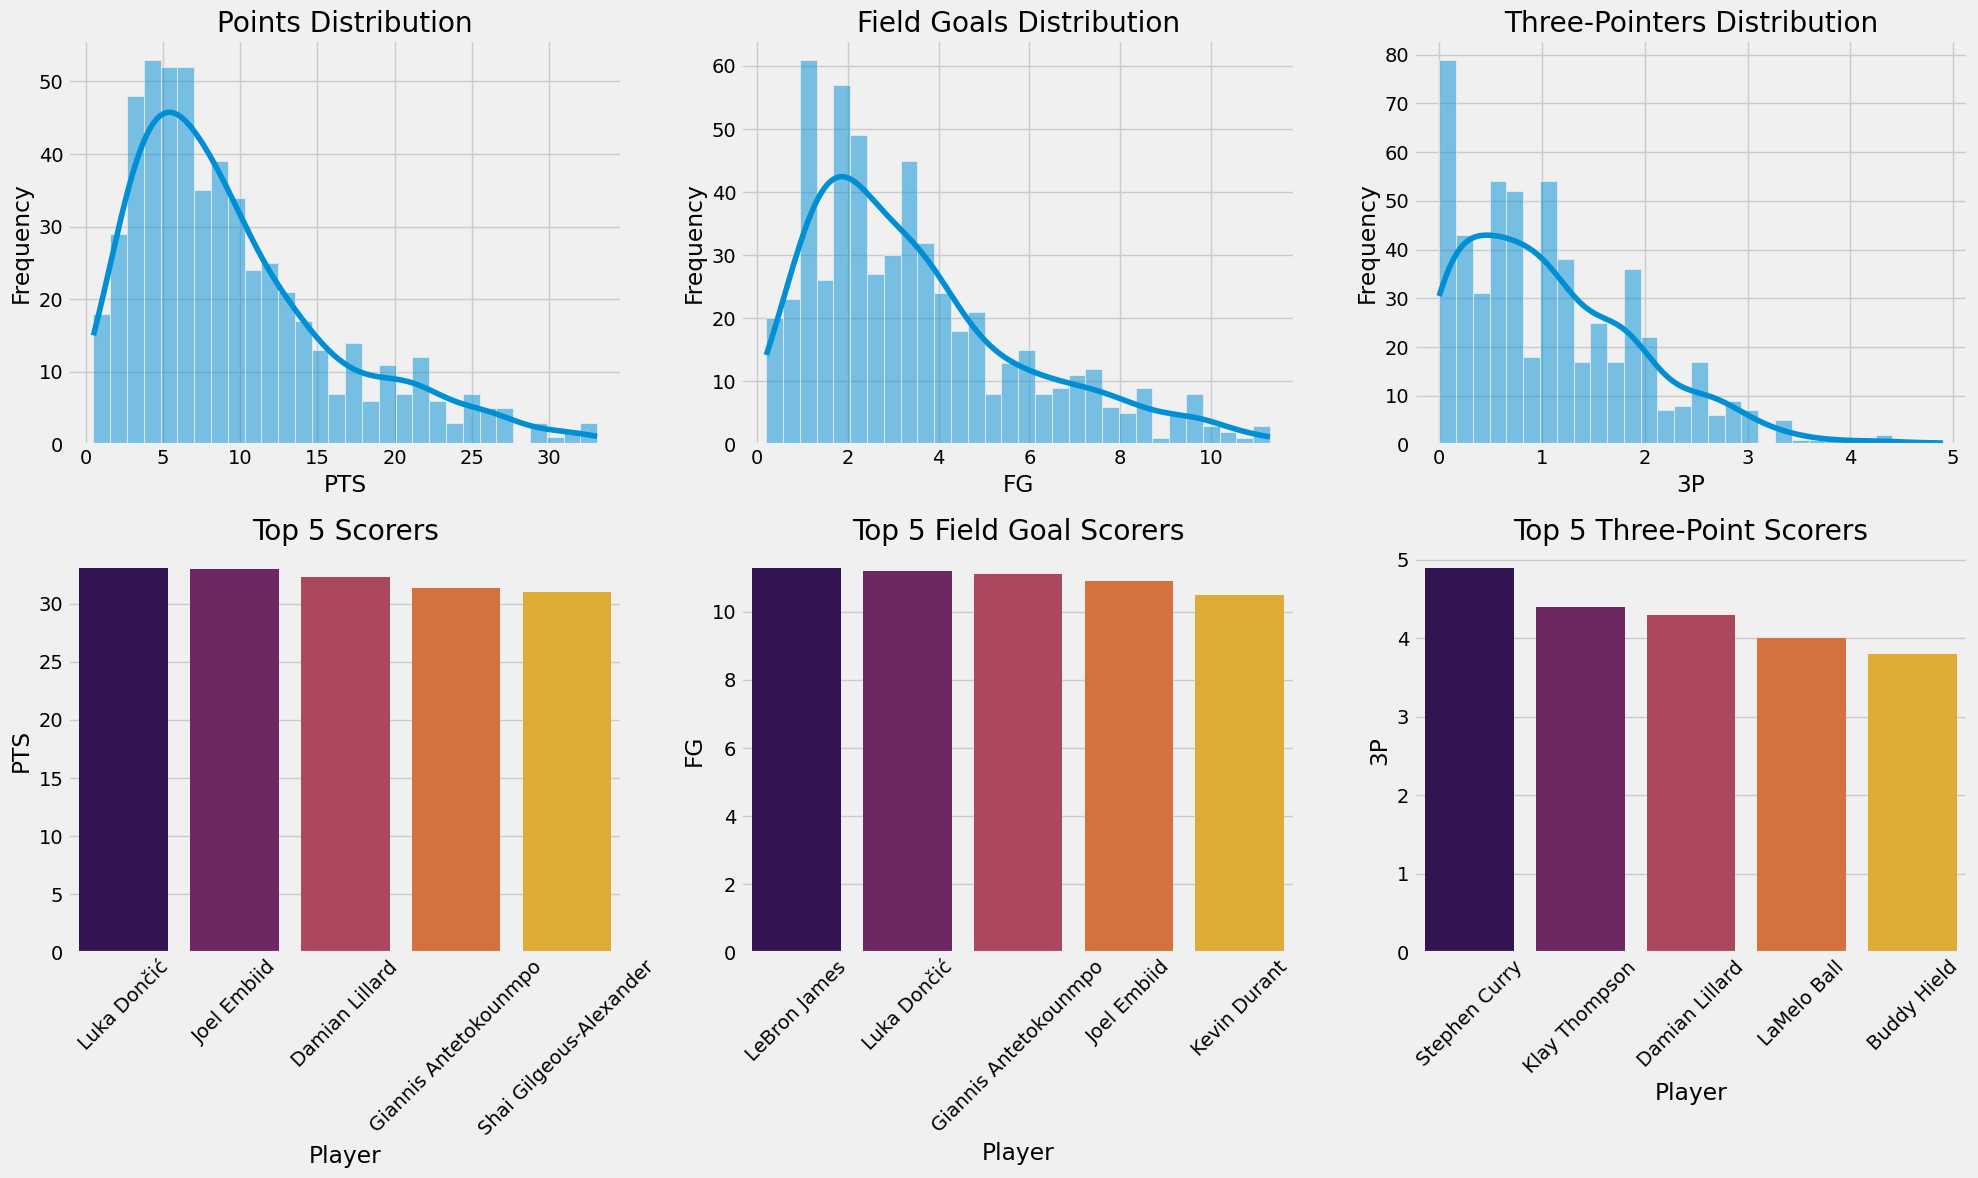

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# distribution
def plot_scoring_distribution(metric, title, ax):
    sns.histplot(players[metric], kde=True, bins=30, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(metric)
    ax.set_ylabel('Frequency')

# scorers
def plot_top_scorers(metric, title, ax):
    top_scorers = players.nlargest(5, metric)
    sns.barplot(x='Player', y=metric, data=top_scorers, palette='inferno', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Player')
    ax.set_ylabel(metric)
    ax.set_xticks(range(len(top_scorers)))  # Add this line to set the number of tick labels explicitly
    ax.set_xticklabels(top_scorers['Player'], rotation=45)

# distribution
metrics_distribution = ['PTS', 'FG', '3P']
titles_distribution = ['Points Distribution', 'Field Goals Distribution', 'Three-Pointers Distribution']

# scorers
metrics_scorers = ['PTS', 'FG', '3P']
titles_scorers = ['Top 5 Scorers', 'Top 5 Field Goal Scorers', 'Top 5 Three-Point Scorers']

# grid of plots for better understanding
for i in range(3):
    plot_scoring_distribution(metrics_distribution[i], titles_distribution[i], axes[0, i])
    plot_top_scorers(metrics_scorers[i], titles_scorers[i], axes[1, i])
    
plt.tight_layout()
plt.show()

Interesting findings telling us top 5 scorers being Dončić, Embiid, Lillard, Antetokounmpo and Shai, while top FG scorers welcome two players that are not putting large numbers, but still making effective plays - Lebron James and Kevin Durant. Three point scorers are, without any surprise, splash brothers Curry & Thompson, with Damian "Dame Time" Lillard is coming in third. 

#### 1.3.7. Performance vs Age - does the number really matter?

In [32]:
fig = px.bar(players, x='Age', y='PTS')
fig.update_layout(
    title='Points across the age', 
    xaxis = dict(
        title='Age', 
        showgrid=True
    ), 
    yaxis = dict(
        title='Points', 
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

We can tell that the points distribution is rapidly decreasing as the age increases. One more interesting thing happens to pop in my head looking at this graph: years 23 to 27 are apparently "peak basketball years", meaning your performance and points distribution are at their highest in that timespan. 

#### 1.3.8. As we already figured out the trend of shooting threes, it's only natural to visualize top 10 three-point shooters in the game right now.

In [33]:
# Sort the DataFrame by '3P', '3PA', and '3P%' columns in descending order
sorted_players = players.sort_values(by=['3P', '3PA', '3P%'], ascending=False)

# Select the top 10 players with relevant columns
top_10_shooters = sorted_players.head(10)[['Player', 'Pos', 'Age', 'Tm', '3P', '3PA', '3P%']]

# Reset the index and add a 'Rank' column
top_10_shooters.reset_index(drop=True, inplace=True)
top_10_shooters.index = range(1, 11)

# Print the top 10 3PT shooters
print(top_10_shooters)

              Player Pos   Age   Tm   3P   3PA    3P%
1      Stephen Curry  PG  34.0  GSW  4.9  11.4  0.427
2      Klay Thompson  SG  32.0  GSW  4.4  10.8  0.408
3     Damian Lillard  PG  32.0  POR  4.3  11.4  0.381
4        LaMelo Ball  PG  21.0  CHO  4.0  10.6  0.376
5        Buddy Hield  SF  30.0  IND  3.8   9.0  0.425
6   Donovan Mitchell  SG  26.0  CLE  3.7   9.4  0.389
7    Anfernee Simons  SG  23.0  POR  3.5   9.2  0.381
8      Malik Beasley  SG  26.0  LAL  3.4   9.4  0.362
9       Jayson Tatum  PF  24.0  BOS  3.3   9.3  0.351
10      Kyrie Irving  PG  30.0  BRK  3.3   8.7  0.374


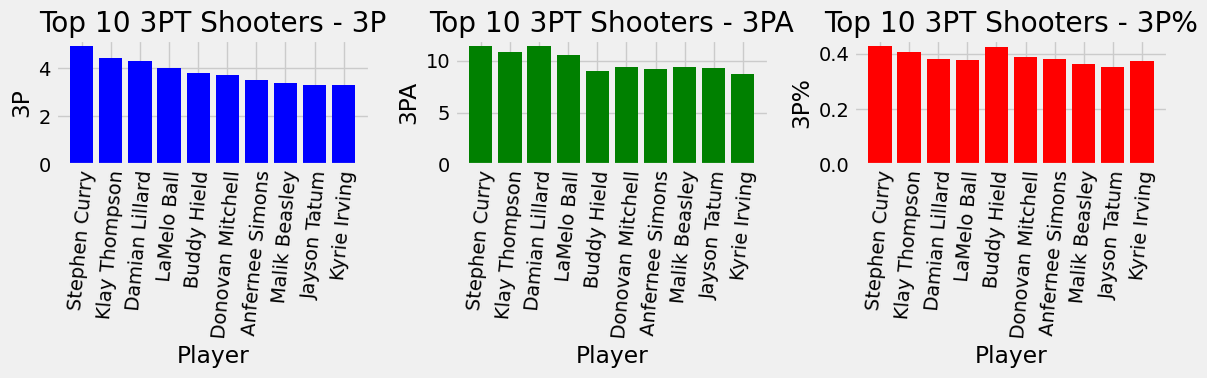

In [34]:
# visualize it

# Set the player names as x-axis labels
player_names = top_10_shooters['Player'].tolist()

# Set the data values
three_points = top_10_shooters['3P'].tolist()
three_point_attempts = top_10_shooters['3PA'].tolist()
three_point_percentage = top_10_shooters['3P%'].tolist()

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Bar chart for 3P
axes[0].bar(player_names, three_points, color='blue')
axes[0].set_xlabel('Player')
axes[0].set_ylabel('3P')
axes[0].set_title('Top 10 3PT Shooters - 3P')
axes[0].tick_params(axis='x', rotation=85)

# Bar chart for 3PA
axes[1].bar(player_names, three_point_attempts, color='green')
axes[1].set_xlabel('Player')
axes[1].set_ylabel('3PA')
axes[1].set_title('Top 10 3PT Shooters - 3PA')
axes[1].tick_params(axis='x', rotation=85)

# Bar chart for 3P%
axes[2].bar(player_names, three_point_percentage, color='red')
axes[2].set_xlabel('Player')
axes[2].set_ylabel('3P%')
axes[2].set_title('Top 10 3PT Shooters - 3P%')
axes[2].tick_params(axis='x', rotation=85)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

Steph Curry, Klay Thompson and Damian Lillard are top 3 players according to all the metrics we've given - 3P made, 3P attempts and 3P percentage. No real surprise here, to be perfectly honest, any other name would cause table flipping.

#### 1.3.9. Biggest player impacts on team performance - is Embiid really the MVP?

Biggest question that I had in mind while doing this analysis was "Is the NBA MVP Awards really rigged?" How in the world did Joel Embiid win over Nikola Jokić?! We'll introduce some calculations in order to see players with the biggest impact on their respective teams.

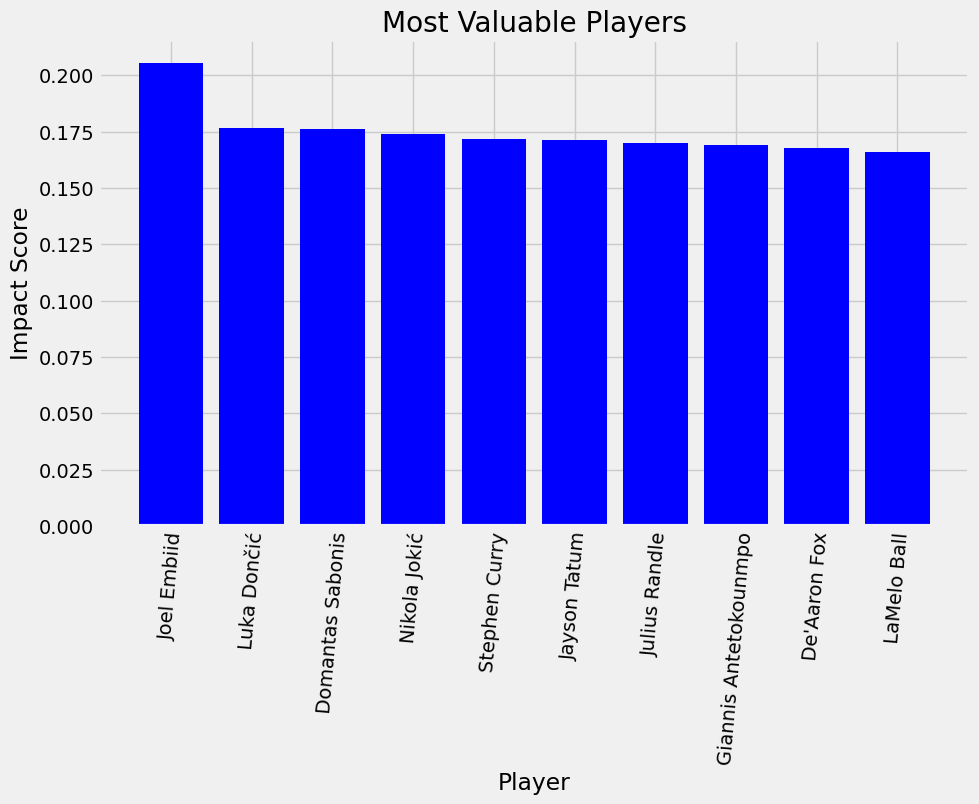

                            PTS   TRB   AST  STL  BLK  Impact Score
Player                Tm                                           
Joel Embiid           PHI  33.0  10.4   4.1  1.1  1.6      0.205485
Luka Dončić           DAL  33.1   8.8   8.1  1.5  0.5      0.176570
Domantas Sabonis      SAC  18.7  12.4   6.9  0.9  0.4      0.176075
Nikola Jokić          DEN  24.8  11.7  10.0  1.3  0.7      0.173773
Stephen Curry         GSW  29.4   6.3   6.4  1.0  0.4      0.171801
Jayson Tatum          BOS  30.1   8.7   4.7  1.0  0.8      0.171073
Julius Randle         NYK  25.1  10.5   4.1  0.7  0.3      0.169796
Giannis Antetokounmpo MIL  31.3  12.0   5.4  0.8  0.8      0.169189
De'Aaron Fox          SAC  25.4   4.3   6.3  1.1  0.3      0.167563
LaMelo Ball           CHO  23.3   6.4   8.4  1.3  0.3      0.165831


In [35]:
# introducing calculations per team and grouping data by team
team_stats = players.groupby('Tm').agg({'PTS': 'sum', 'TRB': 'sum', 'AST': 'sum', 'STL': 'sum', 'BLK': 'sum'})

# grouping data by player and team plus calculations
player_stats = players.groupby(['Player', 'Tm']).agg({'PTS': 'sum', 'TRB': 'sum', 'AST': 'sum', 'STL': 'sum', 'BLK': 'sum'})

# player impact score as their contribution in total team contribution
player_stats['Impact Score'] = (player_stats['PTS'] + player_stats['TRB'] + player_stats['AST'] + player_stats['STL'] + player_stats['BLK']) / (team_stats['PTS'] + team_stats['TRB'] + team_stats['AST'] + team_stats['STL'] + team_stats['BLK'])

# Sort the player_stats DataFrame by Impact Score in descending order
sorted_player_stats = player_stats.sort_values('Impact Score', ascending=False)

# Select the top 10 players with the highest Impact Score
top_players = sorted_player_stats.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_players.index.get_level_values('Player'), top_players['Impact Score'], color='b')

# Set plot title and axis labels
plt.title('Most Valuable Players')
plt.xlabel('Player')
plt.ylabel('Impact Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=85)

# Display the plot
plt.show()
print(top_players)

As a wise man once said - numbers don't lie. It seems like Embiid took that MVP award respectfully, with approx. 0.3 more value than Jokić. It is interesting to see that, even though Jokić averages (and I can not address this enough, AVERAGES) triple double numbers, Embiid has bigger impact score overall.

### With this, we've come to an end of the EDA part of the project. All the answers were found, so let's group all of them in the Q&A section so we can wrap it up.

- Q1: When did the 3 point shooting trend started to arise, and who can we thank for it?
- Q2: Does the home court advantage actually exist, as it does in football?
- Q3: Was the MVP award total miss?

- A1: 3-point shooting trend started to arise around 2011., right after Steph Curry was introduced to the NBA.
- A2: Home court advantage does exist, but it is not as lethal as it is in football. Celtics are the best team defending their home ground in NBA.
- A3: According to the stats, Embiid had the biggest impact on their team performance, and has better FG% overall, so award is in good hands, regardless of the Playoff outcome. Remember: MVP award is given for regular season ONLY.

EDIT: There's justice in this world - Jokić won the Playoffs, Playoffs MVP and Finals MVP awards.

# 2. Machine Learning

We can start with the machine learning part of this notebook now. Data used in this part is scraped from basketball-reference.com using package called playwright. After the scraping, data is concated in order that one row represents one match, and its respective statistical data.

### 2.1. Importing libraries and data + cleaning data

In [37]:
import pandas as pd 
df = pd.read_csv('C:/Users/grgur/OneDrive/Desktop/NBA Machine Learning Project/data/machine_learning.csv', index_col=0)
df.head(10)

mp   mp.1    fg    fga    fg%    3p   3pa    3p%    ft   fta  ...  \
0  240.0  240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0  18.0  ...   
1  240.0  240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0  19.0  ...   
2  240.0  240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0  23.0  ...   
3  240.0  240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0  19.0  ...   
4  240.0  240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0  20.0  ...   
5  240.0  240.0  34.0   99.0  0.343  11.0  39.0  0.282  13.0  16.0  ...   
6  240.0  240.0  35.0   83.0  0.422   9.0  24.0  0.375  12.0  18.0  ...   
7  240.0  240.0  42.0   86.0  0.488   5.0  20.0  0.250  18.0  20.0  ...   
8  240.0  240.0  44.0   87.0  0.506  10.0  23.0  0.435  27.0  32.0  ...   
9  240.0  240.0  39.0   77.0  0.506  15.0  45.0  0.333  28.0  32.0  ...   

   tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  \
0          22.8          29.0         178.0         111.0       DAL   
1          50.0          32.6         152.0         111.0       ATL   
2          20.0          30.9         148.0         116.0       SAS   
3          28.6          30.9         138.0         118.0       MIN   
4          16.8          30.9         157.0          90.0       MEM   
5          33.9          27.2         106.0         106.0       ORL   
6          33.3          30.9         171.0         105.0       MIN   
7          32.0          32.4         158.0         126.0       LAC   
8          22.5          38.2         179.0         140.0       DAL   
9          23.7          31.4         188.0         136.0       SAC   

   total_opp  home_opp  season        date    won  
0         95         1    2016  2015-12-09   True  
1         98         0    2016  2015-12-09  False  
2        107         1    2018  2017-10-18  False  
3         99         0    2018  2017-10-18   True  
4         92         1    2021  2021-04-30  False  
5         75         0    2021  2021-04-30   True  
6        107         1    2017  2017-03-08  False  
7         91         0    2017  2017-03-08   True  
8        121         1    2019  2019-03-26   True  
9        125         0    2019  2019-03-26  False  

[10 rows x 150 columns]

In [38]:
# Sorting values by date 
df = df.sort_values("date")

# Resetting index value because when sorted by date index numbers are not sorted correctly so we're resetting it to 0 
df = df.reset_index(drop=True)
df

mp   mp.1    fg   fga    fg%    3p   3pa    3p%    ft   fta  ...  \
0      240.0  240.0  35.0  83.0  0.422   6.0  18.0  0.333  19.0  27.0  ...   
1      240.0  240.0  38.0  94.0  0.404   9.0  29.0  0.310  10.0  17.0  ...   
2      240.0  240.0  37.0  87.0  0.425   7.0  19.0  0.368  16.0  23.0  ...   
3      240.0  240.0  41.0  96.0  0.427   9.0  30.0  0.300  20.0  22.0  ...   
4      240.0  240.0  37.0  82.0  0.451   8.0  27.0  0.296  12.0  15.0  ...   
...      ...    ...   ...   ...    ...   ...   ...    ...   ...   ...  ...   
17767  240.0  240.0  34.0  85.0  0.400  15.0  38.0  0.395  14.0  19.0  ...   
17768  240.0  240.0  41.0  88.0  0.466   9.0  40.0  0.225  13.0  15.0  ...   
17769  240.0  240.0  31.0  75.0  0.413  11.0  32.0  0.344  21.0  31.0  ...   
17770  240.0  240.0  34.0  80.0  0.425  11.0  28.0  0.393  11.0  12.0  ...   
17771  240.0  240.0  38.0  92.0  0.413  19.0  46.0  0.413   8.0   8.0  ...   

       tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  \
0              69.4          43.7         206.0         104.0       GSW   
1              53.2          34.6         162.0         104.0       CHI   
2              30.4          29.0         138.0         105.0       CLE   
3              37.5          38.9         201.0         120.0       NOP   
4              33.3          23.6         132.0         104.0       DET   
...             ...           ...           ...           ...       ...   
17767          42.9          36.3         133.0         112.0       GSW   
17768          45.0          94.4         300.0         112.0       BOS   
17769          33.3          36.2         222.0         107.0       GSW   
17770          33.3          31.5         186.0         111.0       GSW   
17771         100.0          42.6         141.0         126.0       BOS   

       total_opp  home_opp  season        date    won  
0            111         1    2016  2015-10-27  False  
1             97         1    2016  2015-10-27  False  
2             95         0    2016  2015-10-27   True  
3             95         0    2016  2015-10-27   True  
4            106         0    2016  2015-10-27  False  
...          ...       ...     ...         ...    ...  
17767        107         0    2022  2022-06-10  False  
17768         94         0    2022  2022-06-13   True  
17769        104         1    2022  2022-06-13  False  
17770        103         0    2022  2022-06-16  False  
17771         90         1    2022  2022-06-16   True  

[17772 rows x 150 columns]

In [39]:
# Dropping columns that we're not going to use - minutes played (there are duplicates) and should always be the same value

del df['index_opp']
del df['mp.1']
del df['mp_opp.1']
del df['mp_max_opp.1']
del df['mp_max.1']

In [40]:
# Adding targeting by "won" column - this will allow the machine to recognize winning patterns by team

def add_target(team):
    team["target"] = team["won"].shift(-1)  # target the next value of the column
    return team

# Splitting dataframe by team
df = df.groupby("team", group_keys=False).apply(add_target)

# Checking if the function is done correctly

df[df["team"] == "BOS"]

mp    fg   fga    fg%    3p   3pa    3p%    ft   fta    ft%  ...  \
29     240.0  39.0  85.0  0.459   8.0  24.0  0.333  26.0  27.0  0.963  ...   
42     240.0  32.0  85.0  0.376   7.0  26.0  0.269  32.0  41.0  0.780  ...   
79     240.0  35.0  98.0  0.357   6.0  29.0  0.207  11.0  14.0  0.786  ...   
126    240.0  35.0  83.0  0.422  10.0  27.0  0.370  18.0  22.0  0.818  ...   
149    240.0  44.0  97.0  0.454  12.0  30.0  0.400  18.0  23.0  0.783  ...   
...      ...   ...   ...    ...   ...   ...    ...   ...   ...    ...  ...   
17763  240.0  30.0  80.0  0.375  15.0  37.0  0.405  13.0  17.0  0.765  ...   
17765  240.0  43.0  89.0  0.483  13.0  35.0  0.371  17.0  24.0  0.708  ...   
17767  240.0  34.0  85.0  0.400  15.0  38.0  0.395  14.0  19.0  0.737  ...   
17769  240.0  31.0  75.0  0.413  11.0  32.0  0.344  21.0  31.0  0.677  ...   
17770  240.0  34.0  80.0  0.425  11.0  28.0  0.393  11.0  12.0  0.917  ...   

       usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  total_opp  \
29             29.2         120.0         123.0       PHI         95   
42             29.8         231.0         101.0       TOR        113   
79             30.1         126.0         101.0       SAS         95   
126            29.6         145.0         110.0       IND        100   
149            35.1         171.0         119.0       WAS         98   
...             ...           ...           ...       ...        ...   
17763          36.4         263.0         103.0       GSW        107   
17765          32.7         164.0         135.0       GSW        100   
17767          36.3         133.0         112.0       GSW        107   
17769          36.2         222.0         107.0       GSW        104   
17770          31.5         186.0         111.0       GSW        103   

       home_opp  season        date    won  target  
29            0    2016  2015-10-28   True   False  
42            0    2016  2015-10-30  False   False  
79            0    2016  2015-11-01  False   False  
126           1    2016  2015-11-04  False    True  
149           0    2016  2015-11-06   True    True  
...         ...     ...         ...    ...     ...  
17763         1    2022  2022-06-05  False    True  
17765         0    2022  2022-06-08   True   False  
17767         0    2022  2022-06-10  False   False  
17769         1    2022  2022-06-13  False   False  
17770         0    2022  2022-06-16  False     NaN  

[653 rows x 146 columns]

Now that we've introduced "Target" column we can see what the function shift(-1) does - target is the next value of the "Won" column. To summarize: "Target" indicating if the team won their next game, "Won" indicating current game status.

There's a problem where there is no information about previous matches - this problem occurs on the start of each season. We can fix this by labeling those matches as a value different from 0 and 1 - let's make it 2.

In [41]:
# Indicating null values 

df["target"][pd.isnull(df["target"])] = 2 

# Editing target column to be and show as integers and saying that 1 indicates a win, 0 indicates a loss and 2 indicates null value

df["target"] = df["target"].astype(int, errors="ignore")
df

C:\Users\grgur\AppData\Local\Temp\ipykernel_17068\1127774110.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



mp    fg   fga    fg%    3p   3pa    3p%    ft   fta    ft%  ...  \
0      240.0  35.0  83.0  0.422   6.0  18.0  0.333  19.0  27.0  0.704  ...   
1      240.0  38.0  94.0  0.404   9.0  29.0  0.310  10.0  17.0  0.588  ...   
2      240.0  37.0  87.0  0.425   7.0  19.0  0.368  16.0  23.0  0.696  ...   
3      240.0  41.0  96.0  0.427   9.0  30.0  0.300  20.0  22.0  0.909  ...   
4      240.0  37.0  82.0  0.451   8.0  27.0  0.296  12.0  15.0  0.800  ...   
...      ...   ...   ...    ...   ...   ...    ...   ...   ...    ...  ...   
17767  240.0  34.0  85.0  0.400  15.0  38.0  0.395  14.0  19.0  0.737  ...   
17768  240.0  41.0  88.0  0.466   9.0  40.0  0.225  13.0  15.0  0.867  ...   
17769  240.0  31.0  75.0  0.413  11.0  32.0  0.344  21.0  31.0  0.677  ...   
17770  240.0  34.0  80.0  0.425  11.0  28.0  0.393  11.0  12.0  0.917  ...   
17771  240.0  38.0  92.0  0.413  19.0  46.0  0.413   8.0   8.0  1.000  ...   

       usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  total_opp  \
0              43.7         206.0         104.0       GSW        111   
1              34.6         162.0         104.0       CHI         97   
2              29.0         138.0         105.0       CLE         95   
3              38.9         201.0         120.0       NOP         95   
4              23.6         132.0         104.0       DET        106   
...             ...           ...           ...       ...        ...   
17767          36.3         133.0         112.0       GSW        107   
17768          94.4         300.0         112.0       BOS         94   
17769          36.2         222.0         107.0       GSW        104   
17770          31.5         186.0         111.0       GSW        103   
17771          42.6         141.0         126.0       BOS         90   

       home_opp  season        date    won  target  
0             1    2016  2015-10-27  False       0  
1             1    2016  2015-10-27  False       1  
2             0    2016  2015-10-27   True       1  
3             0    2016  2015-10-27   True       1  
4             0    2016  2015-10-27  False       1  
...         ...     ...         ...    ...     ...  
17767         0    2022  2022-06-10  False       0  
17768         0    2022  2022-06-13   True       1  
17769         1    2022  2022-06-13  False       0  
17770         0    2022  2022-06-16  False       2  
17771         1    2022  2022-06-16   True       2  

[17772 rows x 146 columns]

In [42]:
# Checking missing/null values in columns

nulls = pd.isnull(df)
nulls = nulls.sum()
nulls

mp          0
fg          0
fga         0
fg%         0
3p          0
           ..
home_opp    0
season      0
date        0
won         0
target      0
Length: 146, dtype: int64

In [43]:
# Identifying columns where there are missing values

nulls = nulls[nulls > 0]

In [44]:
# Creating new list with columns without the null columns, tilde is negation operation that checks the name of the columns and drops it if it is in nulls operator

better_columns = df.columns[~df.columns.isin(nulls.index)]

# check for columns 
better_columns

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp', 'team_opp', 'total_opp',
       'home_opp', 'season', 'date', 'won', 'target'],
      dtype='object', length=142)

In [45]:
# Creating a new dataframe instead of slicing

df = df[better_columns].copy()

### 2.2. Feature Selection

We're now ready for a machine learning part, and we're going to start by selecting a smaller number of columns to train the model on, and by that we're avoiding the issue of overfitting and unnecessary correlations. We're going to use feature selector for that, time series split to split our data so we can train on one set of data and validate/test on the different dataset.

In [46]:
# Importing libraries and classes

#%pip install scikit-learn
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

In [47]:
# Defining classes

rc = RidgeClassifier(alpha=1)
split = TimeSeriesSplit(n_splits=3)
sfs = SequentialFeatureSelector(rc, n_features_to_select=30, direction="forward", cv=split)

# TimeSplitSeries is used so it can ensure that trained data is not the same dataset for the validation part
# RidgeClassifier being ML model that uses ridge regression which will do the classification of teams win/lose. 
# Alpha is used for regularization. Regularization improves the conditioning of the problem and reduces the variance of the estimates.
# SequentialFeatureSelector will help us pick best feature for ML. Forward meaning it should always look up to the future rows
# We picked 30 features for a start which is about 20 percent of out dataframe

In [48]:
# Selecting columns that we can not scale because of their nature such as season, name of the team and date.

dropped_columns = ["team", "team_opp", "season", "target", "date", "won"]

In [49]:
featured_columns = df.columns[~df.columns.isin(dropped_columns)]
featured_columns 

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'trb%_max_opp', 'ast%_max_opp', 'stl%_max_opp', 'blk%_max_opp',
       'tov%_max_opp', 'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp',
       'total_opp', 'home_opp'],
      dtype='object', length=136)

What we need to do now is to scale our columns that will stay for the next processing part. By utilizing minmaxscaler from sklearn all the values should transform to 0-1 values, which will provide a clarity for the machine, knowing all the values were standardized.

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[featured_columns] = scaler.fit_transform(df[featured_columns])
df

mp        fg       fga       fg%        3p       3pa       3p%  \
0      0.0  0.363636  0.338235  0.366029  0.206897  0.212121  0.395487   
1      0.0  0.431818  0.500000  0.322967  0.310345  0.378788  0.368171   
2      0.0  0.409091  0.397059  0.373206  0.241379  0.227273  0.437055   
3      0.0  0.500000  0.529412  0.377990  0.310345  0.393939  0.356295   
4      0.0  0.409091  0.323529  0.435407  0.275862  0.348485  0.351544   
...    ...       ...       ...       ...       ...       ...       ...   
17767  0.0  0.340909  0.367647  0.313397  0.517241  0.515152  0.469121   
17768  0.0  0.500000  0.411765  0.471292  0.310345  0.545455  0.267221   
17769  0.0  0.272727  0.220588  0.344498  0.379310  0.424242  0.408551   
17770  0.0  0.340909  0.294118  0.373206  0.379310  0.363636  0.466746   
17771  0.0  0.431818  0.470588  0.344498  0.655172  0.636364  0.490499   

             ft       fta       ft%  ...  usg%_max_opp  ortg_max_opp  \
0      0.418605  0.412698  0.654609  ...      0.277279      0.554502   
1      0.209302  0.253968  0.519253  ...      0.160462      0.345972   
2      0.348837  0.349206  0.645274  ...      0.088575      0.232227   
3      0.441860  0.333333  0.893816  ...      0.215661      0.530806   
4      0.255814  0.222222  0.766628  ...      0.019255      0.203791   
...         ...       ...       ...  ...           ...           ...   
17767  0.302326  0.285714  0.693116  ...      0.182285      0.208531   
17768  0.279070  0.222222  0.844807  ...      0.928113      1.000000   
17769  0.465116  0.476190  0.623104  ...      0.181001      0.630332   
17770  0.232558  0.174603  0.903151  ...      0.120668      0.459716   
17771  0.162791  0.111111  1.000000  ...      0.263158      0.246445   

       drtg_max_opp  team_opp  total_opp  home_opp  season        date    won  \
0          0.317647       GSW   0.451923       1.0    2016  2015-10-27  False   
1          0.317647       CHI   0.317308       1.0    2016  2015-10-27  False   
2          0.329412       CLE   0.298077       0.0    2016  2015-10-27   True   
3          0.505882       NOP   0.298077       0.0    2016  2015-10-27   True   
4          0.317647       DET   0.403846       0.0    2016  2015-10-27  False   
...             ...       ...        ...       ...     ...         ...    ...   
17767      0.411765       GSW   0.413462       0.0    2022  2022-06-10  False   
17768      0.411765       BOS   0.288462       0.0    2022  2022-06-13   True   
17769      0.352941       GSW   0.384615       1.0    2022  2022-06-13  False   
17770      0.400000       GSW   0.375000       0.0    2022  2022-06-16  False   
17771      0.576471       BOS   0.250000       1.0    2022  2022-06-16   True   

       target  
0           0  
1           1  
2           1  
3           1  
4           1  
...       ...  
17767       0  
17768       1  
17769       0  
17770       2  
17771       2  

[17772 rows x 142 columns]

In [51]:
# Fitting SFS - this is picking 30 best features for prediction

sfs.fit(df[featured_columns], df["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30)

In [55]:
# Getting the list of predictor columns - if the feature selector has selected the column to be proper for predictions, return a list with those columns

predictors = list(featured_columns[sfs.get_support()])
#predictors

# Remove hashtags to run this cell to get a list of features

So what we got here is the mix of the statistics for both home and away team, with statistics for the best individual player on the team. We can proceed to the training of the baseline model.

### 2.3. Baseline model

In [53]:
# creating function to make predictions 

import pandas as pd

def backtest(data, model, predictors, start=2, step=1):
    all_predictions = []
    
    seasons = sorted(data["season"].unique())
    
    for i in range(start, len(seasons), step):
        season = seasons[i]
        
        train = data[data["season"] < season]
        test = data[data["season"] == season]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["real", "prediction"]
        
        all_predictions.append(combined)
    
    return pd.concat(all_predictions)

In [56]:
# Let's see how good the predictions are so far

predictions = backtest(df, rc, predictors)
print(predictions)

# Creating a metric that tells us how accurate we were

from sklearn.metrics import accuracy_score

# This is optional: Dropping 2 value from the real column for better prediction:
# predictions=predictions[predictions["real"] !=2]
accuracy_score(predictions["real"], predictions["prediction"])

       real  prediction
5250      1           1
5251      1           1
5252      0           0
5253      1           0
5254      0           1
...     ...         ...
17767     0           0
17768     1           1
17769     0           1
17770     2           1
17771     2           1

[12522 rows x 2 columns]


0.5471969333972209

From the looks of it, we were correct 54.7 percent of the time. Let's see if we can make this better by defining baseline for accuracy.

In [57]:
# Setting a baseline for good accuracy by introducing home court advantage - check EDA part of the notebook for reference

df.groupby("home").apply(lambda x: x[x["won"] == 1].shape[0] / x.shape[0])

home
0.0    0.428314
1.0    0.571686
dtype: float64

We can see that home team win as much as 57% of the time. What this basically means is that we would've got better accuracy if all the predictions were for the home win. I don't find that information amusing, so let's introduce couple more features in order to improve accuracy.

### 2.4. Rolling Averages

Introducing Rolling Averages to the game. Why? Well, apart from having an awesome name (kinda like superheroes), it's because our current model is performing by looking at the current game to predict next one. We didn't quite think of those situations called "outliers" aka anomalies - one team could've had a really bad/good game, there was devastating injury that changed the momentum, pace and/or trajectory of the game. 

Lucky for us, there's a solution. By taking teams average performance throughout their last 10 games as a variable, we can introduce new data to our model, and get better accuracy score.

In [58]:
# Defining a new dataframe and introducing new columns for RA

df_rolling = df[list(featured_columns) + ["won", "team", "season"]]
df_rolling

mp        fg       fga       fg%        3p       3pa       3p%  \
0      0.0  0.363636  0.338235  0.366029  0.206897  0.212121  0.395487   
1      0.0  0.431818  0.500000  0.322967  0.310345  0.378788  0.368171   
2      0.0  0.409091  0.397059  0.373206  0.241379  0.227273  0.437055   
3      0.0  0.500000  0.529412  0.377990  0.310345  0.393939  0.356295   
4      0.0  0.409091  0.323529  0.435407  0.275862  0.348485  0.351544   
...    ...       ...       ...       ...       ...       ...       ...   
17767  0.0  0.340909  0.367647  0.313397  0.517241  0.515152  0.469121   
17768  0.0  0.500000  0.411765  0.471292  0.310345  0.545455  0.267221   
17769  0.0  0.272727  0.220588  0.344498  0.379310  0.424242  0.408551   
17770  0.0  0.340909  0.294118  0.373206  0.379310  0.363636  0.466746   
17771  0.0  0.431818  0.470588  0.344498  0.655172  0.636364  0.490499   

             ft       fta       ft%  ...  blk%_max_opp  tov%_max_opp  \
0      0.418605  0.412698  0.654609  ...         0.079      0.679245   
1      0.209302  0.253968  0.519253  ...         0.140      0.509434   
2      0.348837  0.349206  0.645274  ...         0.185      0.270440   
3      0.441860  0.333333  0.893816  ...         0.063      0.344864   
4      0.255814  0.222222  0.766628  ...         0.047      0.300839   
...         ...       ...       ...  ...           ...           ...   
17767  0.302326  0.285714  0.693116  ...         0.103      0.401468   
17768  0.279070  0.222222  0.844807  ...         0.124      0.423480   
17769  0.465116  0.476190  0.623104  ...         0.076      0.300839   
17770  0.232558  0.174603  0.903151  ...         0.063      0.300839   
17771  0.162791  0.111111  1.000000  ...         0.160      1.000000   

       usg%_max_opp  ortg_max_opp  drtg_max_opp  total_opp  home_opp    won  \
0          0.277279      0.554502      0.317647   0.451923       1.0  False   
1          0.160462      0.345972      0.317647   0.317308       1.0  False   
2          0.088575      0.232227      0.329412   0.298077       0.0   True   
3          0.215661      0.530806      0.505882   0.298077       0.0   True   
4          0.019255      0.203791      0.317647   0.403846       0.0  False   
...             ...           ...           ...        ...       ...    ...   
17767      0.182285      0.208531      0.411765   0.413462       0.0  False   
17768      0.928113      1.000000      0.411765   0.288462       0.0   True   
17769      0.181001      0.630332      0.352941   0.384615       1.0  False   
17770      0.120668      0.459716      0.400000   0.375000       0.0  False   
17771      0.263158      0.246445      0.576471   0.250000       1.0   True   

       team  season  
0       NOP    2016  
1       CLE    2016  
2       CHI    2016  
3       GSW    2016  
4       ATL    2016  
...     ...     ...  
17767   BOS    2022  
17768   GSW    2022  
17769   BOS    2022  
17770   BOS    2022  
17771   GSW    2022  

[17772 rows x 139 columns]

In [59]:
# Creating a function to split our data by team and then find the performance for last 10 matches

def find_team_avgs(team):
    
    # Exclude the "team" column before calculating the rolling mean - this is fixing the issue where "team" was not int
    
    team_numeric = team.drop(columns=['team'])
    rolling = team_numeric.rolling(10).mean()
    return rolling

# Grouping by teams and season so we can ensure rolling average is properly used
# By this, 10 rows for calculations will be specifically for one team and for that specific season played
df_rolling = df_rolling.groupby(["team", "season"], group_keys=False).apply(find_team_avgs)
df_rolling

mp        fg       fga       fg%        3p       3pa       3p%  \
0      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...    ...       ...       ...       ...       ...       ...       ...   
17767  0.0  0.381818  0.292647  0.428230  0.468966  0.477273  0.448100   
17768  0.0  0.502273  0.364706  0.517703  0.455172  0.481818  0.440736   
17769  0.0  0.354545  0.279412  0.404545  0.437931  0.465152  0.429572   
17770  0.0  0.354545  0.294118  0.389952  0.434483  0.459091  0.431710   
17771  0.0  0.484091  0.379412  0.482297  0.486207  0.507576  0.448812   

             ft       fta       ft%  ...  stl%_max_opp  blk%_max_opp  \
0           NaN       NaN       NaN  ...           NaN           NaN   
1           NaN       NaN       NaN  ...           NaN           NaN   
2           NaN       NaN       NaN  ...           NaN           NaN   
3           NaN       NaN       NaN  ...           NaN           NaN   
4           NaN       NaN       NaN  ...           NaN           NaN   
...         ...       ...       ...  ...           ...           ...   
17767  0.434884  0.373016  0.764177  ...        0.0570        0.1113   
17768  0.320930  0.282540  0.757993  ...        0.0716        0.1171   
17769  0.434884  0.385714  0.736639  ...        0.0591        0.1113   
17770  0.406977  0.357143  0.754142  ...        0.0572        0.1111   
17771  0.316279  0.269841  0.801750  ...        0.0656        0.1152   

       tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  total_opp  \
0               NaN           NaN           NaN           NaN        NaN   
1               NaN           NaN           NaN           NaN        NaN   
2               NaN           NaN           NaN           NaN        NaN   
3               NaN           NaN           NaN           NaN        NaN   
4               NaN           NaN           NaN           NaN        NaN   
...             ...           ...           ...           ...        ...   
17767      0.471908      0.170603      0.431754      0.522353   0.348077   
17768      0.374109      0.321566      0.642654      0.564706   0.392308   
17769      0.483229      0.174711      0.438863      0.483529   0.350000   
17770      0.483229      0.172144      0.460190      0.472941   0.344231   
17771      0.444025      0.308601      0.628910      0.568235   0.395192   

       home_opp  won  season  
0           NaN  NaN     NaN  
1           NaN  NaN     NaN  
2           NaN  NaN     NaN  
3           NaN  NaN     NaN  
4           NaN  NaN     NaN  
...         ...  ...     ...  
17767       0.5  0.6  2022.0  
17768       0.4  0.7  2022.0  
17769       0.5  0.5  2022.0  
17770       0.5  0.5  2022.0  
17771       0.5  0.7  2022.0  

[17772 rows x 138 columns]

At the start of the season, we can not calculate rolling averages because there's no 10 games before, it's the start of the new season, hence all the missing values in the dataframe. 

If you want to play around the calculations, in the cell above find "team_numeric.rolling(10).mean()" and change number 10 to be less. That will allow us to predict games even at the start of the season, when there's no significant samplesize. For this specific use-case, we'll leave number to be 10.

In [60]:
# Renaming rolling averages columns so they don't overwrite existing columns named the same when combining dataframes
# Merging original and rolling averages dataframes, axis 1 to combine them into columns, not rows

rolling_cols = [f"{col}_10" for col in df_rolling.columns]
df_rolling.columns = rolling_cols

df = pd.concat([df, df_rolling], axis=1)
df

mp        fg       fga       fg%        3p       3pa       3p%  \
0      0.0  0.363636  0.338235  0.366029  0.206897  0.212121  0.395487   
1      0.0  0.431818  0.500000  0.322967  0.310345  0.378788  0.368171   
2      0.0  0.409091  0.397059  0.373206  0.241379  0.227273  0.437055   
3      0.0  0.500000  0.529412  0.377990  0.310345  0.393939  0.356295   
4      0.0  0.409091  0.323529  0.435407  0.275862  0.348485  0.351544   
...    ...       ...       ...       ...       ...       ...       ...   
17767  0.0  0.340909  0.367647  0.313397  0.517241  0.515152  0.469121   
17768  0.0  0.500000  0.411765  0.471292  0.310345  0.545455  0.267221   
17769  0.0  0.272727  0.220588  0.344498  0.379310  0.424242  0.408551   
17770  0.0  0.340909  0.294118  0.373206  0.379310  0.363636  0.466746   
17771  0.0  0.431818  0.470588  0.344498  0.655172  0.636364  0.490499   

             ft       fta       ft%  ...  stl%_max_opp_10  blk%_max_opp_10  \
0      0.418605  0.412698  0.654609  ...              NaN              NaN   
1      0.209302  0.253968  0.519253  ...              NaN              NaN   
2      0.348837  0.349206  0.645274  ...              NaN              NaN   
3      0.441860  0.333333  0.893816  ...              NaN              NaN   
4      0.255814  0.222222  0.766628  ...              NaN              NaN   
...         ...       ...       ...  ...              ...              ...   
17767  0.302326  0.285714  0.693116  ...           0.0570           0.1113   
17768  0.279070  0.222222  0.844807  ...           0.0716           0.1171   
17769  0.465116  0.476190  0.623104  ...           0.0591           0.1113   
17770  0.232558  0.174603  0.903151  ...           0.0572           0.1111   
17771  0.162791  0.111111  1.000000  ...           0.0656           0.1152   

       tov%_max_opp_10  usg%_max_opp_10  ortg_max_opp_10  drtg_max_opp_10  \
0                  NaN              NaN              NaN              NaN   
1                  NaN              NaN              NaN              NaN   
2                  NaN              NaN              NaN              NaN   
3                  NaN              NaN              NaN              NaN   
4                  NaN              NaN              NaN              NaN   
...                ...              ...              ...              ...   
17767         0.471908         0.170603         0.431754         0.522353   
17768         0.374109         0.321566         0.642654         0.564706   
17769         0.483229         0.174711         0.438863         0.483529   
17770         0.483229         0.172144         0.460190         0.472941   
17771         0.444025         0.308601         0.628910         0.568235   

       total_opp_10  home_opp_10  won_10  season_10  
0               NaN          NaN     NaN        NaN  
1               NaN          NaN     NaN        NaN  
2               NaN          NaN     NaN        NaN  
3               NaN          NaN     NaN        NaN  
4               NaN          NaN     NaN        NaN  
...             ...          ...     ...        ...  
17767      0.348077          0.5     0.6     2022.0  
17768      0.392308          0.4     0.7     2022.0  
17769      0.350000          0.5     0.5     2022.0  
17770      0.344231          0.5     0.5     2022.0  
17771      0.395192          0.5     0.7     2022.0  

[17772 rows x 280 columns]

In [61]:
# Dropping null values - dropping seasons first 10 games

df = df.dropna()
df

mp        fg       fga       fg%        3p       3pa       3p%  \
243    0.0  0.522727  0.382353  0.523923  0.344828  0.333333  0.457245   
251    0.0  0.659091  0.426471  0.645933  0.620690  0.515152  0.562945   
252    0.0  0.386364  0.382353  0.358852  0.206897  0.181818  0.445368   
253    0.0  0.500000  0.382353  0.497608  0.344828  0.318182  0.475059   
256    0.0  0.318182  0.132353  0.500000  0.275862  0.272727  0.432304   
...    ...       ...       ...       ...       ...       ...       ...   
17767  0.0  0.340909  0.367647  0.313397  0.517241  0.515152  0.469121   
17768  0.0  0.500000  0.411765  0.471292  0.310345  0.545455  0.267221   
17769  0.0  0.272727  0.220588  0.344498  0.379310  0.424242  0.408551   
17770  0.0  0.340909  0.294118  0.373206  0.379310  0.363636  0.466746   
17771  0.0  0.431818  0.470588  0.344498  0.655172  0.636364  0.490499   

             ft       fta       ft%  ...  stl%_max_opp_10  blk%_max_opp_10  \
243    0.255814  0.238095  0.708285  ...           0.0628           0.0679   
251    0.325581  0.238095  0.927655  ...           0.0613           0.0772   
252    0.511628  0.412698  0.827305  ...           0.0625           0.1145   
253    0.325581  0.349206  0.593932  ...           0.0646           0.0759   
256    0.581395  0.444444  0.879813  ...           0.0741           0.0982   
...         ...       ...       ...  ...              ...              ...   
17767  0.302326  0.285714  0.693116  ...           0.0570           0.1113   
17768  0.279070  0.222222  0.844807  ...           0.0716           0.1171   
17769  0.465116  0.476190  0.623104  ...           0.0591           0.1113   
17770  0.232558  0.174603  0.903151  ...           0.0572           0.1111   
17771  0.162791  0.111111  1.000000  ...           0.0656           0.1152   

       tov%_max_opp_10  usg%_max_opp_10  ortg_max_opp_10  drtg_max_opp_10  \
243           0.413522         0.124134         0.361611         0.449412   
251           0.469497         0.219641         0.394787         0.531765   
252           0.437841         0.138126         0.507109         0.360000   
253           0.512159         0.133633         0.277251         0.388235   
256           0.313312         0.179974         0.500000         0.471765   
...                ...              ...              ...              ...   
17767         0.471908         0.170603         0.431754         0.522353   
17768         0.374109         0.321566         0.642654         0.564706   
17769         0.483229         0.174711         0.438863         0.483529   
17770         0.483229         0.172144         0.460190         0.472941   
17771         0.444025         0.308601         0.628910         0.568235   

       total_opp_10  home_opp_10  won_10  season_10  
243        0.347115          0.4     0.8     2016.0  
251        0.324038          0.5     1.0     2016.0  
252        0.351923          0.6     0.4     2016.0  
253        0.308654          0.4     0.6     2016.0  
256        0.380769          0.5     0.4     2016.0  
...             ...          ...     ...        ...  
17767      0.348077          0.5     0.6     2022.0  
17768      0.392308          0.4     0.7     2022.0  
17769      0.350000          0.5     0.5     2022.0  
17770      0.344231          0.5     0.5     2022.0  
17771      0.395192          0.5     0.7     2022.0  

[15882 rows x 280 columns]

We'll add some more information to our model, information that is available before every game - who's playing home and who's away, who is the next opponent for the current teams.

In [62]:
# Like we created target column, we need another plus more functions in order to work

# Look at the home col, find if the next game is home/away and put that in the current row

def shift_col(team, col_name):
    next_col = team[col_name].shift(-1)
    return next_col

# Function to group by team and get next game home value 

def add_col(df, col_name):
    return df.groupby("team", group_keys=False).apply(lambda x: shift_col(x, col_name))

# New column that shows if the team will be home or away

df["next_home"] = add_col(df, "home")

# Doing the same for more columns

df["team_opp_next"] = add_col(df, "team_opp")
df["date_next"] = add_col(df, "date")

C:\Users\grgur\AppData\Local\Temp\ipykernel_17068\773922995.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\grgur\AppData\Local\Temp\ipykernel_17068\773922995.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\grgur\AppData\Local\Temp\ipykernel_17068\773922995.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [63]:
df = df.copy()

In [64]:
# Adding opponent stats to the equation by merging for the next game

final = df.merge(df[rolling_cols + ["team_opp_next", "date_next", "team"]], left_on=["team", "date_next"], right_on=["team_opp_next", "date_next"])
#final.to_csv('final.csv', index=False)

In [65]:
# Visualize what we've done with the merge and if it's done correctly

#final[["team_x", "team_opp_next_x", "team_y", "team_opp_next_y", "date_next"]]

# Remove hashtags in order to see the merge results

We can now see that all the data is successfully merged, columns that end with "y" are the stats for opponent team, while others that end on "x" are for home team. This happens automatically when using left and right merge in python, x is added for left merge while y is added to right merge.

### 2.5. More accuracy?

Let's now see if we can improve our accuracy by dropping unnecessary columns and using SFS again to find new predictors.

In [66]:
# Dropping object columns

dropped_columns = list(final.columns[final.dtypes == "object"]) + dropped_columns
dropped_columns

['team_x',
 'team_opp',
 'date',
 'team_opp_next_x',
 'date_next',
 'team_opp_next_y',
 'team_y',
 'team',
 'team_opp',
 'season',
 'target',
 'date',
 'won']

In [67]:
# New frame without dropped columns

the_columns = final.columns[~final.columns.isin(dropped_columns)]

In [68]:
# Utilizing SFS with new frame

sfs.fit(final[the_columns], final["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30)

In [69]:
# Return new list of selected columns

predictors = list(the_columns[sfs.get_support()])
predictors

['mp',
 'orb',
 'ast',
 'tov',
 'usg%',
 'pf_max',
 'trb%_max',
 'stl%_max',
 'mp_opp',
 'usg%_opp',
 'usg%_10_x',
 'ft%_max_10_x',
 '3par_max_10_x',
 'usg%_opp_10_x',
 'stl_max_opp_10_x',
 'won_10_x',
 'next_home',
 'drb_10_y',
 'trb%_10_y',
 'usg%_10_y',
 'ft_max_10_y',
 'efg%_max_10_y',
 'tov%_max_10_y',
 'trb%_opp_10_y',
 'usg%_opp_10_y',
 'fga_max_opp_10_y',
 'fta_max_opp_10_y',
 'ft%_max_opp_10_y',
 'orb%_max_opp_10_y',
 'won_10_y']

In [70]:
# Let's make some predictions 

predictions = backtest(final, rc, predictors)

In [71]:
# Get the accuracy score

accuracy_score(predictions["real"], predictions["prediction"])

0.6296296296296297

In [72]:
# Function for printing accuracy score

def print_accuracy_score(predictions):
    # Calculate the accuracy score
    acc_score = accuracy_score(predictions["real"], predictions["prediction"])

    # Convert accuracy score to a formatted string with two decimal points
    acc_formatted = "{:.2f}".format(acc_score * 100)

    # Print the congratulatory message with the accuracy score
    print("Congrats! Your accuracy score is", acc_formatted, "% !")

Now thanks to JV Miller and his beloved "Professional Gambler Newsletter", we have some interesting information regarding sports betting, and it says:

##### Professional sports bettors rarely sustain a long-term winning percentage higher than 55 percent, and it's often as low as 53 or 54 percent. If someone tells you they win 70 percent of their picks (at 11-to-win-10), you are talking to either a liar or a bad record-keeper.

So what this means basically is that we've done better than the professional sportsbettors. We were correct 63 percent of the time with our predictions, after the initial 54 percent, and with some tweaks and additional features we've made our model better for almost 10 percent.

## And by this, we're done! Unfortunately, there were some things that I could not do, but I am planning to pivot back to that: introduce Twitter tweets segmentation by team as a feature; introduce over/under and spread lines as a target feature - letting model guess point spread; introduce player and team power rankings as a feature.



# Thank you for the time invested in reading and analyzing this notebook. Any feedback is much appreciated! :)

### Niko Grgurev, Data Science NEET Academy